In [1]:
#This dissertation has been realized with the help of students in the same dissertation research group as the author,
#in particular Will Adkins and Riccardo Bonzanno. Unless explicitly acknowledged,
#this code is the work of the author."

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import mne

#CNN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.decomposition import PCA

from keras import activations, initializers, regularizers, constraints
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM, GRU, Embedding, SimpleRNN, Conv2D, Flatten
from tensorflow.keras.layers import InputSpec

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
####

#SVM

from sklearn import svm
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
####

#RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
import pickle
####

#CV

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
####

import visualkeras

# Reading data

In [2]:
#reading data from CSVs 
speaking1 = pd.read_csv('E:/Diss/Paradigm/Participants/2/Labelled/speaking1_labelled.csv')
speaking2 = pd.read_csv('E:/Diss/Paradigm/Participants/2/Labelled/speaking2_labelled.csv')
speaking3 = pd.read_csv('E:/Diss/Paradigm/Participants/2/Labelled/speaking3_labelled.csv')
speaking4 = pd.read_csv('E:/Diss/Paradigm/Participants/2/Labelled/speaking4_labelled.csv')
speaking5 = pd.read_csv('E:/Diss/Paradigm/Participants/2/Labelled/speaking5_labelled.csv')
speaking6 = pd.read_csv('E:/Diss/Paradigm/Participants/2/Labelled/speaking6_labelled.csv')
speaking7 = pd.read_csv('E:/Diss/Paradigm/Participants/2/Labelled/speaking7_labelled.csv')
speaking8 = pd.read_csv('E:/Diss/Paradigm/Participants/2/Labelled/speaking8_labelled.csv')
speaking9 = pd.read_csv('E:/Diss/Paradigm/Participants/2/Labelled/speaking9_labelled.csv')
speaking10 = pd.read_csv('E:/Diss/Paradigm/Participants/2/Labelled/speaking10_labelled.csv')

speaking = pd.concat([speaking1, speaking2, speaking3, speaking4, speaking5, speaking6, speaking7, speaking8, speaking9, speaking10], axis = 0)

In [3]:
speaking

Time:256Hz  Epoch           F3          FC5          AF3           F7  \
0        23.000000      0  4249.487305  4254.743652  4278.461426  4266.282227   
1        23.003906      0  4249.487305  4254.743652  4278.461426  4266.282227   
2        23.007812      0  4249.487305  4254.743652  4278.461426  4266.282227   
3        23.011719      0  4249.487305  4254.743652  4278.461426  4266.282227   
4        23.015625      0  4249.487305  4254.743652  4278.461426  4266.282227   
...            ...    ...          ...          ...          ...          ...   
66555  4503.980469    129  4245.384766  4263.589844  4286.666504  4263.333496   
66556  4503.984375    129  4245.384766  4263.589844  4286.666504  4263.333496   
66557  4503.988281    129  4245.384766  4263.589844  4286.666504  4263.333496   
66558  4503.992188    129  4245.384766  4263.589844  4286.666504  4263.333496   
66559  4503.996094    129  4245.384766  4263.589844  4286.666504  4263.333496   

                T7           P7           O1           O2  ...           T8  \
0      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
1      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
2      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
3      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
4      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
...            ...          ...          ...          ...  ...          ...   
66555  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66556  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66557  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66558  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66559  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   

                F8          AF4          FC6           F4   Channel 15  \
0      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
1      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
2      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
3      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
4      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
...            ...          ...          ...          ...          ...   
66555  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66556  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66557  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66558  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66559  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   

        Channel 16  Label Mode of Stimulus       Stage  
0      4256.410156   Lamp            audio   speaking1  
1      4256.410156   Lamp            audio   speaking1  
2      4256.410156   Lamp            audio   speaking1  
3      4256.410156   Lamp            audio   speaking1  
4      4256.410156   Lamp            audio   speaking1  
...            ...    ...              ...         ...  
66555  4264.358887  Clock             text  speaking10  
66556  4264.358887  Clock             text  speaking10  
66557  4264.358887  Clock             text  speaking10  
66558  4264.358887  Clock             text  speaking10  
66559  4264.358887  Clock             text  speaking10  

[665600 rows x 21 columns]

# Splitting data

In [4]:
def Isolate(dataframe):
    
    features = dataframe.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 16', 'Channel 15', 'Label', 'Mode of Stimulus']).to_numpy().reshape(dataframe.shape[0] // (512), 512 * 14)
    targets = dataframe['Label'].to_numpy().reshape(dataframe.shape[0] // (512), 512)[:, 0]
    modes_of_stimuli = dataframe['Mode of Stimulus'].to_numpy().reshape(dataframe.shape[0] // (512), 512)[:, 0]
    return features, targets, modes_of_stimuli

features, targets, modes_of_stimuli = Isolate(speaking)

In [5]:
modes_of_stimuli.shape

(1300,)

In [6]:
targets.shape

(1300,)

In [7]:
speaking_mne = speaking.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Mode of Stimulus', 'Label', 'Stage'])
speaking_mne = speaking_mne/1000000 #bringing data to volts instead of microvolts

In [8]:
speaking_mne

F3       FC5       AF3        F7        T7        P7        O1  \
0      0.004249  0.004255  0.004278  0.004266  0.004246  0.004269  0.004163   
1      0.004249  0.004255  0.004278  0.004266  0.004246  0.004269  0.004163   
2      0.004249  0.004255  0.004278  0.004266  0.004246  0.004269  0.004163   
3      0.004249  0.004255  0.004278  0.004266  0.004246  0.004269  0.004163   
4      0.004249  0.004255  0.004278  0.004266  0.004246  0.004269  0.004163   
...         ...       ...       ...       ...       ...       ...       ...   
66555  0.004245  0.004264  0.004287  0.004263  0.004245  0.004249  0.004206   
66556  0.004245  0.004264  0.004287  0.004263  0.004245  0.004249  0.004206   
66557  0.004245  0.004264  0.004287  0.004263  0.004245  0.004249  0.004206   
66558  0.004245  0.004264  0.004287  0.004263  0.004245  0.004249  0.004206   
66559  0.004245  0.004264  0.004287  0.004263  0.004245  0.004249  0.004206   

             O2        P8        T8        F8       AF4       FC6        F4  
0      0.004252  0.004250  0.004242  0.004261  0.004248  0.004253  0.004237  
1      0.004252  0.004250  0.004242  0.004261  0.004248  0.004253  0.004237  
2      0.004252  0.004250  0.004242  0.004261  0.004248  0.004253  0.004237  
3      0.004252  0.004250  0.004242  0.004261  0.004248  0.004253  0.004237  
4      0.004252  0.004250  0.004242  0.004261  0.004248  0.004253  0.004237  
...         ...       ...       ...       ...       ...       ...       ...  
66555  0.004261  0.004258  0.004250  0.004262  0.004219  0.004260  0.004248  
66556  0.004261  0.004258  0.004250  0.004262  0.004219  0.004260  0.004248  
66557  0.004261  0.004258  0.004250  0.004262  0.004219  0.004260  0.004248  
66558  0.004261  0.004258  0.004250  0.004262  0.004219  0.004260  0.004248  
66559  0.004261  0.004258  0.004250  0.004262  0.004219  0.004260  0.004248  

[665600 rows x 14 columns]

# MNE preprocessing

## Montage using standard 10-20 model

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>
4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


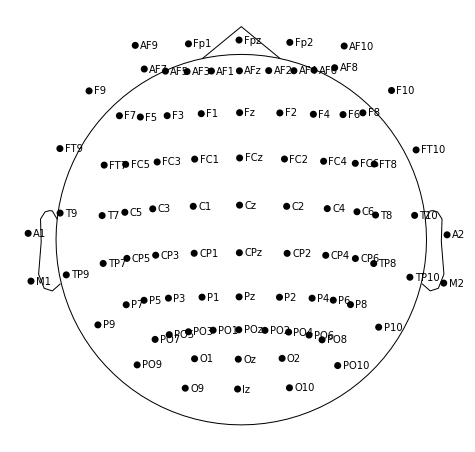

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


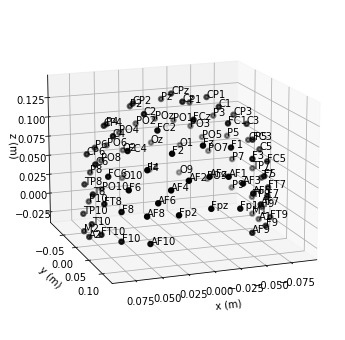

In [9]:
# Standard 10-20 montage. 
# Code taken from MNE tutorials found online.

s1020 = mne.channels.make_standard_montage('standard_1020')
print(s1020)

s1020.plot()  # 2D
fig = s1020.plot(kind='3d', show=False) 
fig = fig.gca().view_init(azim=70, elev=15)

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


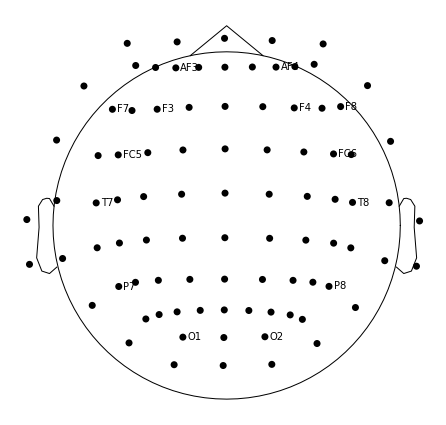

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


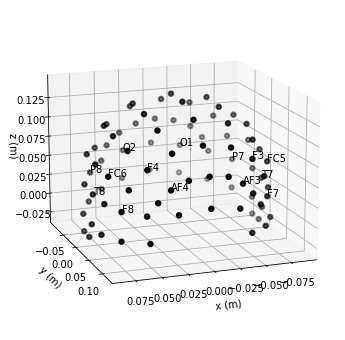

In [10]:
# Plotting montage

ch_names = list(speaking_mne.columns)

mne.viz.plot_montage(s1020, show_names=ch_names)

fig = s1020.plot(kind='3d', show=False, show_names=ch_names)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

In [11]:
#creating montage from speaking data, into RawArray format

sfreq = 256
ch_names = list(speaking_mne.columns)
print(ch_names)
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = 'eeg')
raw_speaking = mne.io.RawArray(speaking_mne[ch_names].transpose(), info)
raw_speaking.set_montage(s1020)
raw_speaking.info

['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']
Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


<Info | 8 non-empty values
 bads: []
 ch_names: F3, FC5, AF3, F7, T7, P7, O1, O2, P8, T8, F8, AF4, FC6, F4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


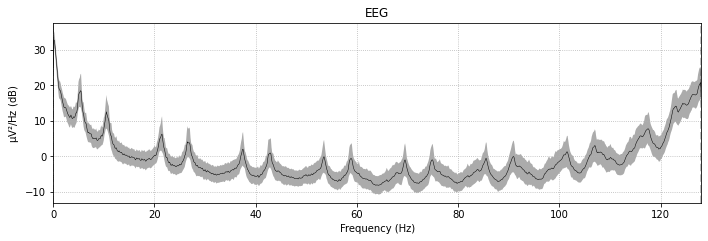

In [12]:
fig = raw_speaking.plot_psd(fmax=128, average=True)

for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


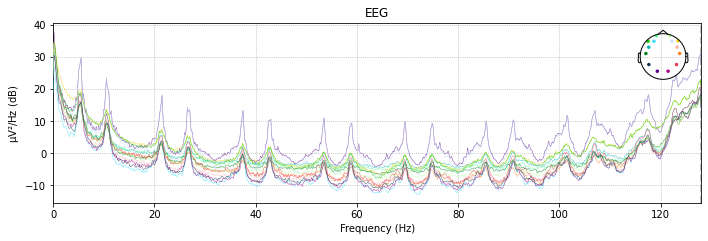

Using matplotlib as 2D backend.


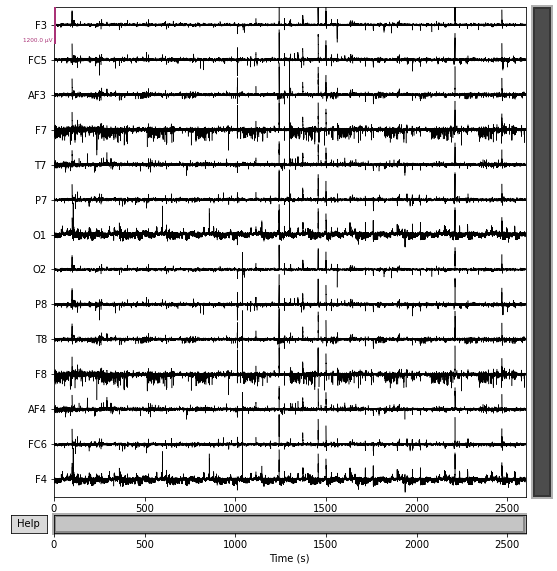

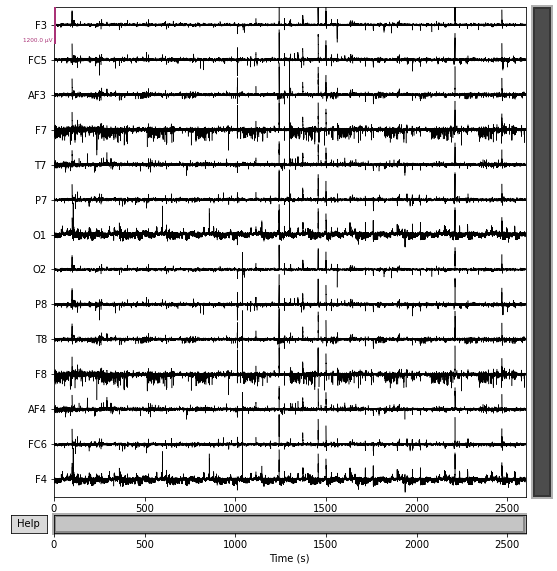

In [13]:
# Power spectral density (PSD) graph of raw speaking data 

raw_speaking.plot_psd(fmax=128)
raw_speaking.plot(duration=3000, scalings=0.0006)

## Creating events and epochs from filtered data

In [14]:
# Creating events to create epoched data for use in evoked responses

speaking_events = mne.make_fixed_length_events(raw_speaking, start=0, stop=4504, duration=2)
events_dict = {'Visual/Ambulance' : 1,
               'Visual/Clock' : 2,
               'Visual/Lamp' : 3,
               'Visual/Hospital' : 4,
               'Audio/Ambulance' : 5,
               'Audio/Clock' : 6,
               'Audio/Lamp' : 7,
               'Audio/Hospital' : 8,
               'Text/Ambulance' : 9,
               'Text/Clock' : 10,
               'Text/Lamp' : 11,
               'Text/Hospital' : 12,
               'None' : 13}

speaking_events[((np.array(modes_of_stimuli) == 'text')*(np.array(targets) == 'Ambulance')), 2] = np.array([9 for i in range(((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Ambulance')).sum())])
speaking_events[((np.array(modes_of_stimuli) == 'text')*(np.array(targets) == 'Clock')), 2] = np.array([10 for i in range(((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Clock')).sum())])
speaking_events[((np.array(modes_of_stimuli) == 'text')*(np.array(targets) == 'Lamp')), 2] = np.array([11 for i in range(((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Lamp')).sum())])
speaking_events[((np.array(modes_of_stimuli) == 'text')*(np.array(targets) == 'Hospital')), 2] = np.array([12 for i in range(((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Hospital')).sum())])

speaking_events[((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Ambulance')), 2] = np.array([5 for i in range(((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Ambulance')).sum())])
speaking_events[((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Clock')), 2] = np.array([6 for i in range(((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Clock')).sum())])
speaking_events[((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Lamp')), 2] = np.array([7 for i in range(((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Lamp')).sum())])
speaking_events[((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Hospital')), 2] = np.array([8 for i in range(((np.array(modes_of_stimuli) == 'audio')*(np.array(targets) == 'Hospital')).sum())])

speaking_events[((np.array(modes_of_stimuli) == 'image')*(np.array(targets) == 'Clock')), 2] = np.array([2 for i in range(((np.array(modes_of_stimuli) == 'image')*(np.array(targets) == 'Clock')).sum())])
speaking_events[((np.array(modes_of_stimuli) == 'image')*(np.array(targets) == 'Lamp')), 2] = np.array([3 for i in range(((np.array(modes_of_stimuli) == 'image')*(np.array(targets) == 'Lamp')).sum())])
speaking_events[((np.array(modes_of_stimuli) == 'image')*(np.array(targets) == 'Hospital')), 2] = np.array([4 for i in range(((np.array(modes_of_stimuli) == 'image')*(np.array(targets) == 'Hospital')).sum())])

speaking_events[np.array(modes_of_stimuli) == 'None', 2] = np.array([13 for i in range((np.array(modes_of_stimuli) == 'None').sum())])



Not setting metadata
1300 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1300 events and 513 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 1299 events and 513 original time points ...


C:\Users\ruthwik\AppData\Local\Temp\ipykernel_11604\2500555773.py:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  speaking_epoched.plot(events = speaking_events, n_epochs=10, scalings = 'auto')


Using data from preloaded Raw for 10 events and 513 original time points ...


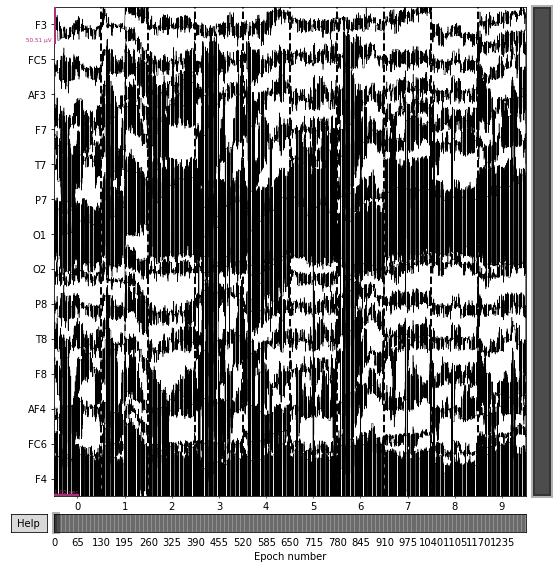

<Epochs |  1299 events (all good), 0 - 2 sec, baseline 0 – 0 sec, ~25 kB, data not loaded,
 'Visual/Ambulance': 100
 'Visual/Clock': 100
 'Visual/Lamp': 100
 'Visual/Hospital': 100
 'Audio/Ambulance': 100
 'Audio/Clock': 100
 'Audio/Lamp': 100
 'Audio/Hospital': 100
 'Text/Ambulance': 100
 'Text/Clock': 99
 and 3 more events ...>

In [15]:
speaking_epoched = mne.Epochs(raw_speaking, tmin=0, tmax = 2, baseline=(0, 0), events = speaking_events, event_id=events_dict)
speaking_epoched.plot(events = speaking_events, n_epochs=10, scalings = 'auto')
speaking_epoched

In [16]:
# speaking_epoched.equalize_event_counts(event_ids=None, method='mintime')
# speaking_epoched

## Playing around with epoched data

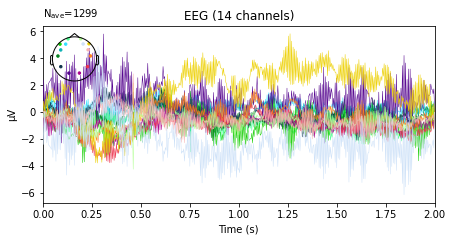

In [17]:
ER_all = speaking_epoched.average()
fig2 = ER_all.plot(spatial_colors=True)

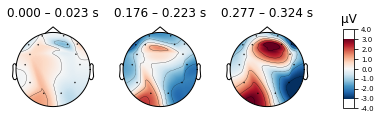

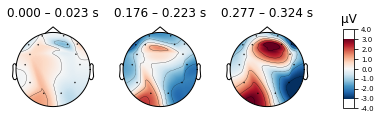

In [18]:
ER_all.plot_topomap(times=[0, 0.2, 0.3], average=0.05)

No projector specified for this dataset. Please consider the method self.add_proj.


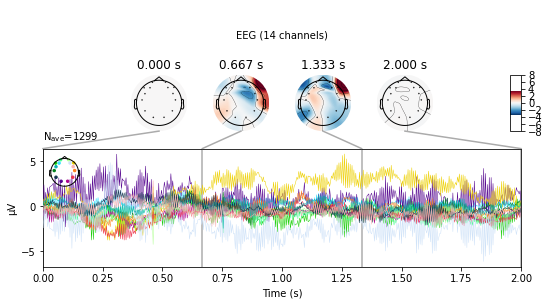

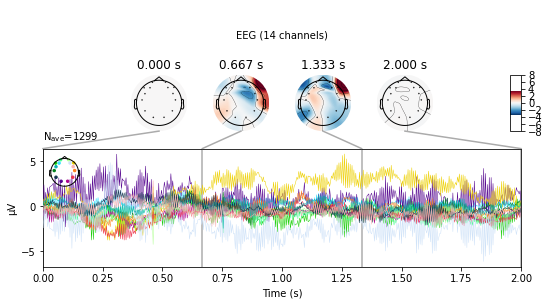

In [19]:
ER_all.plot_joint(times='auto')

No projector specified for this dataset. Please consider the method self.add_proj.


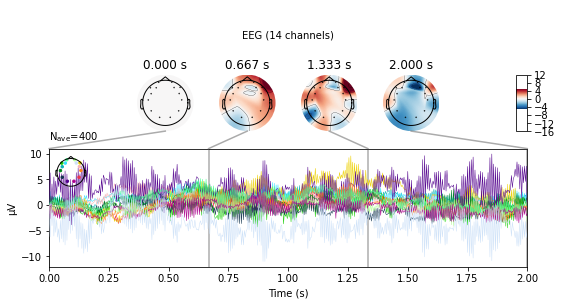

No projector specified for this dataset. Please consider the method self.add_proj.


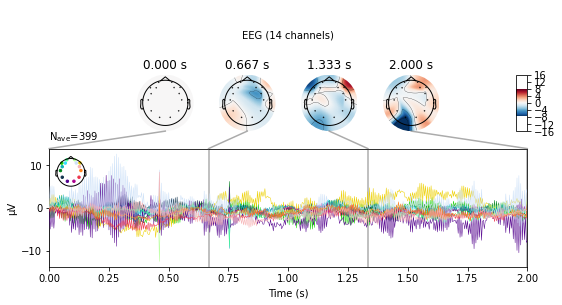

No projector specified for this dataset. Please consider the method self.add_proj.


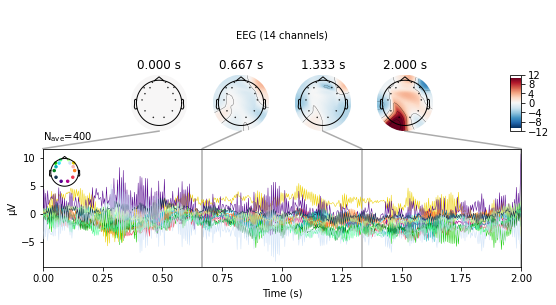

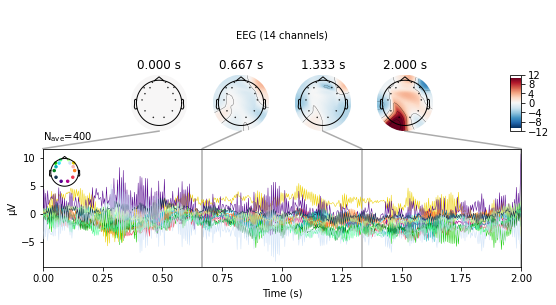

In [20]:
average_audio = speaking_epoched['Audio'].average()
average_text = speaking_epoched['Text'].average()
average_visual = speaking_epoched['Visual'].average()

average_audio.plot_joint(times='auto')
average_text.plot_joint(times='auto')
average_visual.plot_joint(times='auto')

## Evoked responses

In [21]:
occipital = ['O1', 'O2']
temporal = ['T7', 'T8']
broca = ['F7']

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


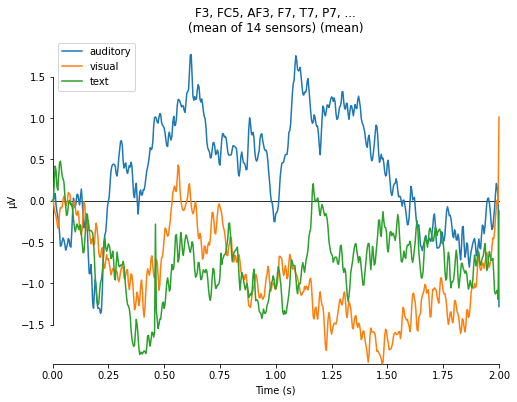

[<Figure size 576x432 with 1 Axes>]

In [22]:
evokeds = dict(auditory=average_audio, visual=average_visual, text=average_text)
picks = [ch_names[n] for n in range(0, 14)]
mne.viz.plot_compare_evokeds(evokeds, picks, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


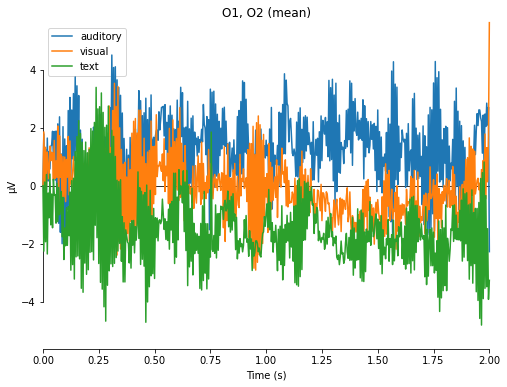

[<Figure size 576x432 with 1 Axes>]

In [23]:
mne.viz.plot_compare_evokeds(evokeds, picks = occipital, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


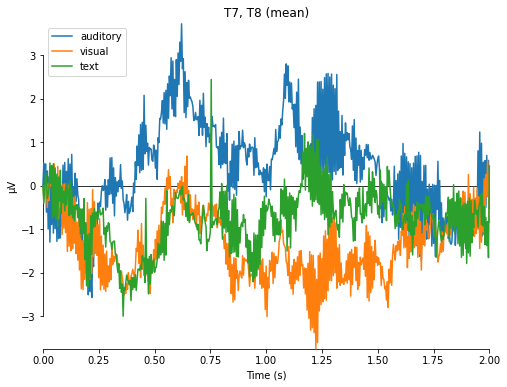

[<Figure size 576x432 with 1 Axes>]

In [24]:
mne.viz.plot_compare_evokeds(evokeds, picks = temporal, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


C:\Users\ruthwik\AppData\Local\Temp\ipykernel_11604\2533468638.py:1: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks = broca, combine='mean')


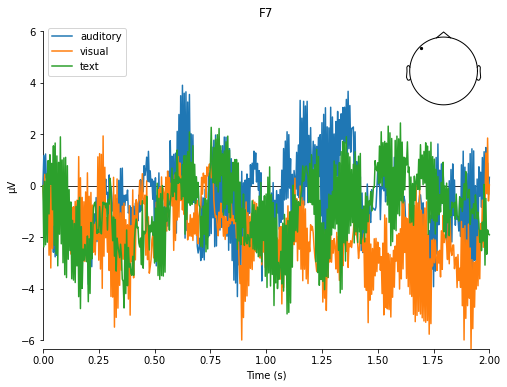

[<Figure size 576x432 with 2 Axes>]

In [25]:
mne.viz.plot_compare_evokeds(evokeds, picks = broca, combine='mean')

In [26]:
speaking_something = speaking_epoched.to_data_frame()
speaking_something = speaking_something.drop(columns = ['time', 'condition', 'epoch'])
ch_names = list(speaking_something.columns)
info = mne.create_info(ch_names = ch_names, sfreq = 256, ch_types = 'eeg')
raw_speaking_epochs = mne.io.RawArray(speaking_something[ch_names].transpose(), info)
raw_speaking_epochs.set_montage(s1020)
raw_speaking_epochs.info

Using data from preloaded Raw for 1299 events and 513 original time points ...
Creating RawArray with float64 data, n_channels=14, n_times=666387
    Range : 0 ... 666386 =      0.000 ...  2603.070 secs
Ready.


<Info | 8 non-empty values
 bads: []
 ch_names: F3, FC5, AF3, F7, T7, P7, O1, O2, P8, T8, F8, AF4, FC6, F4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>

## Filtering

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


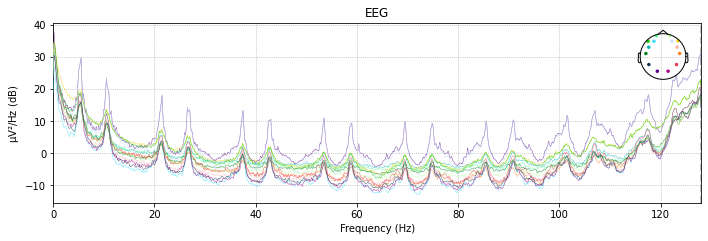

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-stop filter from 48 - 54 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 47.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 47.25 Hz)
- Upper passband edge: 54.50 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 54.75 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


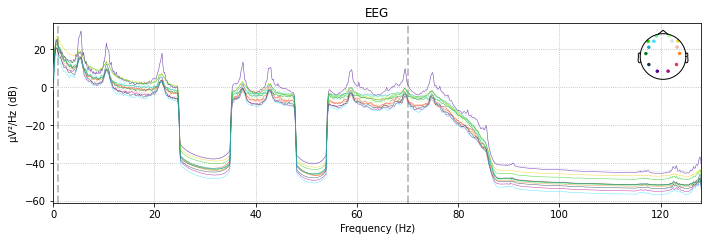

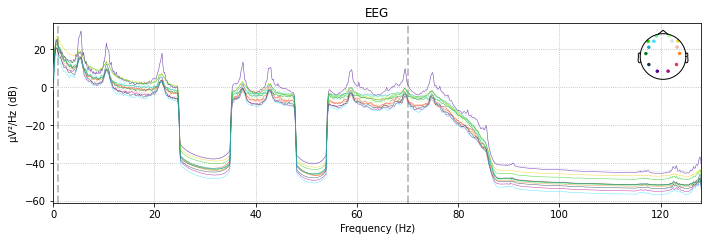

In [27]:
# Band pass and notch filtering needed to stablize data

raw_speaking.plot_psd(fmax=128)
low_cut = 1
hi_cut  = 70

raw_speaking_filt = raw_speaking.copy().filter(l_freq=low_cut, h_freq=hi_cut)
raw_speaking_filt = raw_speaking_filt.copy().notch_filter(freqs = 51, notch_widths = 6).notch_filter(freqs = (30, 110), notch_widths = 10)
raw_speaking_filt.plot_psd(fmax=128)

## ICA

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 14 components
Fitting ICA took 4.9s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1300 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1300 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1300 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1300 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1300 matching events found
No baseline correction applied
0 projection items activated


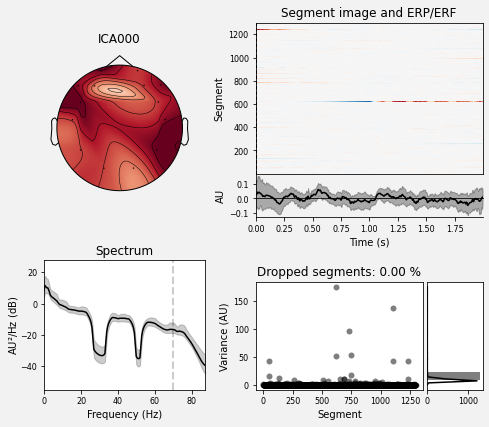

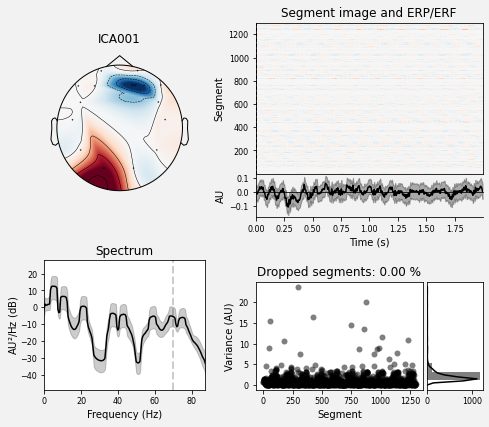

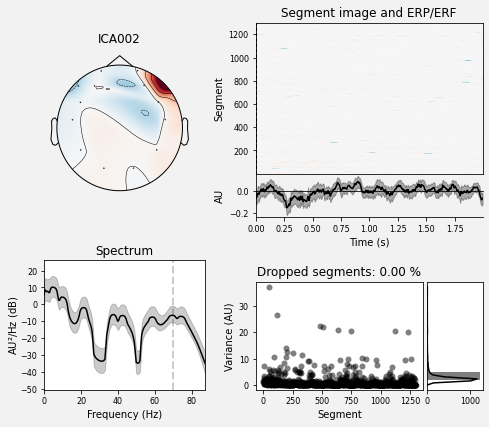

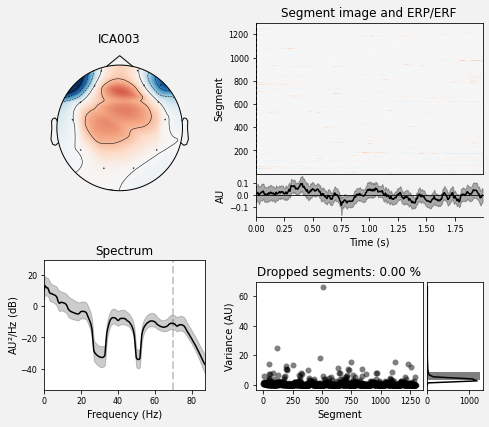

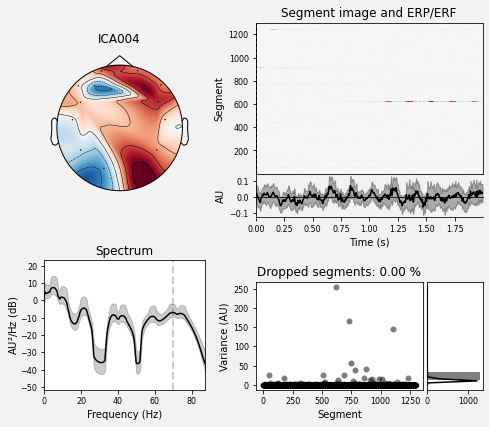

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [28]:
# Independent component analysis (ICA) to obtain and remove bad sources

ica = mne.preprocessing.ICA(max_iter=800)
ica.fit(raw_speaking_filt)
ica.plot_properties(raw_speaking_filt)

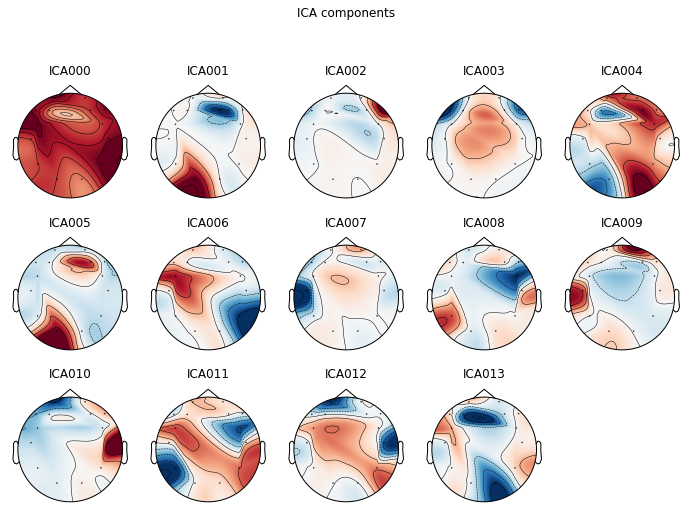

[<MNEFigure size 702x526.68 with 14 Axes>]

In [29]:
# components change for every participant

ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components


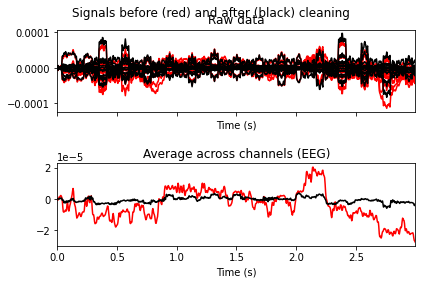

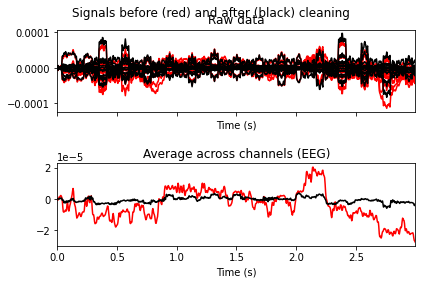

In [30]:
ica.plot_overlay(raw_speaking_filt, exclude=[0, 3])

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components


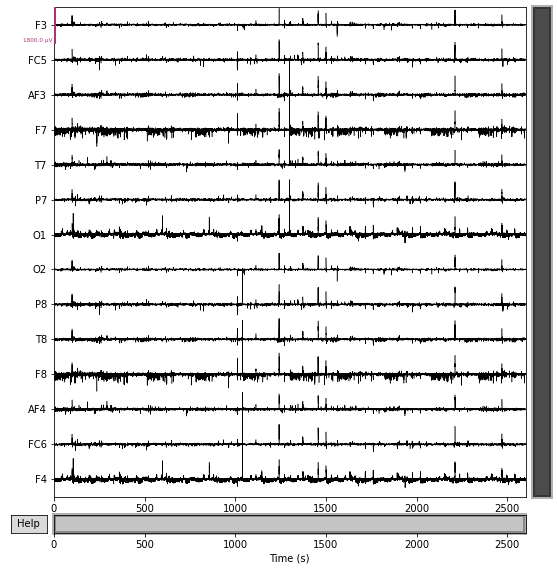

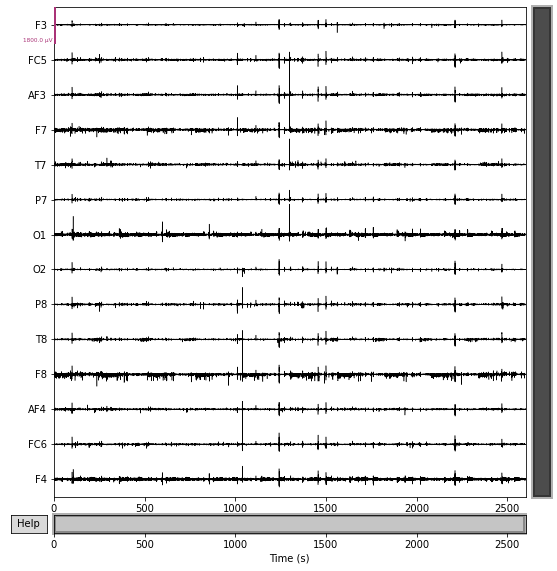

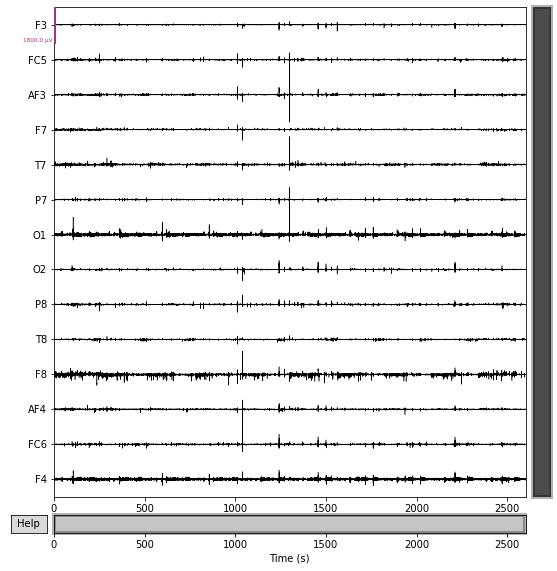

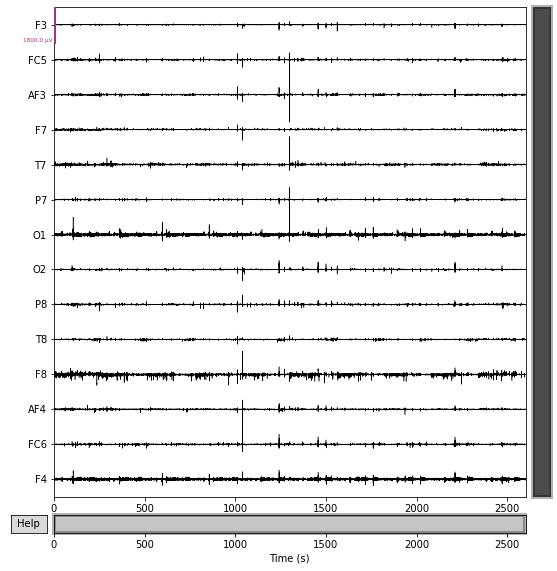

In [31]:
ica.exclude=[0, 3]
speaking_processed_mne = raw_speaking_filt.copy()
ica.apply(speaking_processed_mne)

raw_speaking.plot(duration = 3000, scalings=0.0009)
raw_speaking_filt.plot(duration = 3000, scalings=0.0009)
speaking_processed_mne.plot(duration = 3000, scalings=0.0009)

Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


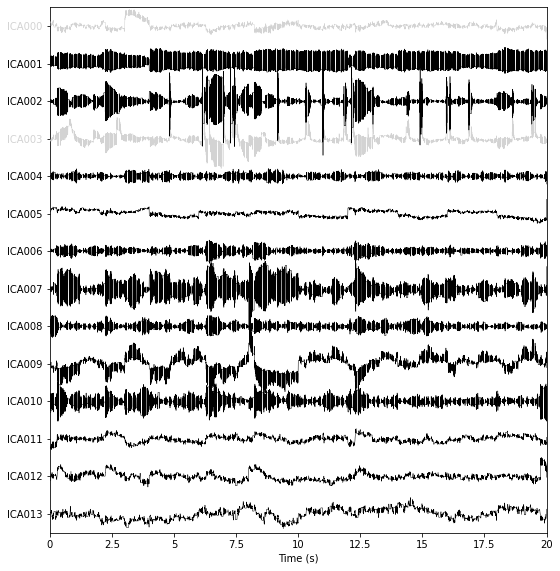

Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


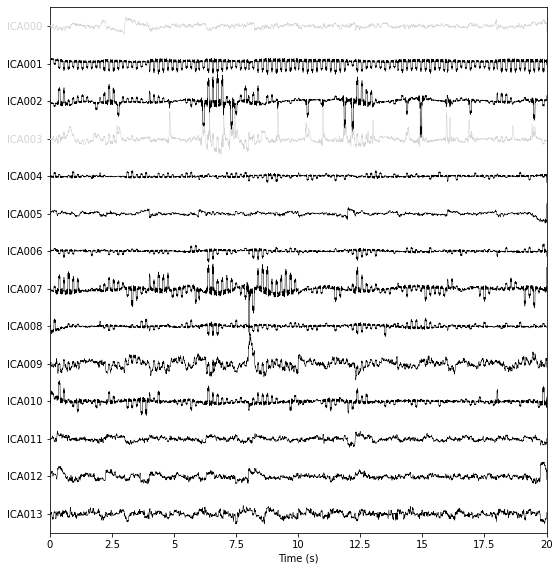

Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


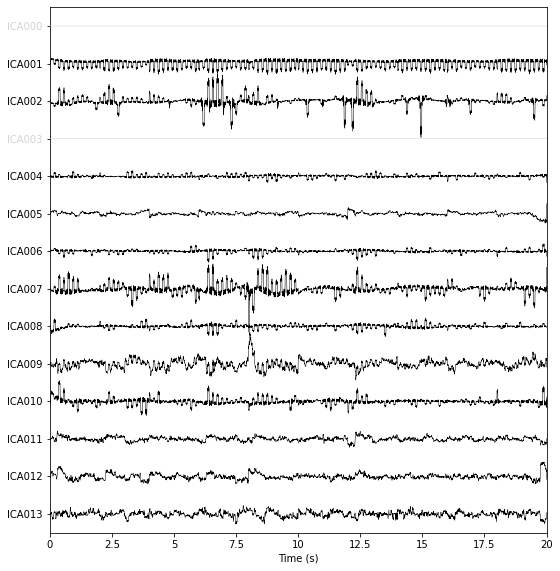

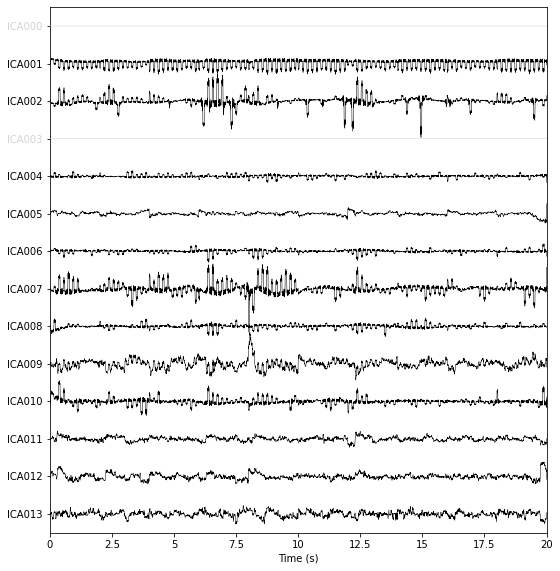

In [32]:
raw_speaking.load_data()
ica.plot_sources(raw_speaking, show_scrollbars=False)
ica.plot_sources(raw_speaking_filt, show_scrollbars=False)
ica.plot_sources(speaking_processed_mne, show_scrollbars=False)

# Machine learning models (split into subsections)

## Feature extraction

In [33]:
speaking_processed = speaking_processed_mne.to_data_frame()
speaking_processed.shape

(665600, 15)

In [34]:
speaking_processed = speaking_processed_mne.to_data_frame().drop(columns = ['time']).to_numpy().reshape(speaking.shape[0] // (512), 512 * 14)
speaking_processed.shape

(1300, 7168)

In [35]:
new_column_values = modes_of_stimuli
nw = targets
df = pd.DataFrame(speaking_processed)

df["mode"] = new_column_values 
df["Label"] = nw
df

0         1         2          3          4          5  \
0    -0.000130 -0.000280 -0.000263  -0.001304  -0.000213  -0.000176   
1     0.462564 -2.216034  8.196046   0.497344  -0.379170   2.108477   
2    -1.507793  2.563895 -2.033442 -16.754660 -29.371291 -12.642524   
3    -1.696602  0.036196  1.237802  11.304930  34.082509   4.430307   
4    -1.723774 -2.590154  3.881065  19.692119  99.728052   6.005747   
...        ...       ...       ...        ...        ...        ...   
1295  0.391655 -1.744577 -1.020734   0.381854  -0.780802   4.064158   
1296 -0.551785  3.106349 -5.833809  -0.915800   4.139789  -3.490751   
1297 -2.448526  0.825180 -9.080749  -7.040516  -5.421760   0.358070   
1298  3.014187  2.508936 -0.415950  -2.066907   1.313944  -7.739497   
1299 -1.569502 -9.643832 -3.179047  -6.541007 -15.088244  -1.512419   

              6         7          8          9  ...       7160      7161  \
0     -0.000142 -0.000133  -0.000254  -0.000228  ...  15.376747  0.812099   
1     -8.028206  6.347065   0.533936   1.656440  ...   9.929596  3.783971   
2    -37.889864 -0.183543   9.533291   2.084072  ... -11.969843 -1.650240   
3    -32.247104 -9.829364 -14.036958  -1.419649  ...  -9.965024 -2.267662   
4    -29.869472 -5.927888  -1.028668   0.696430  ...   0.483570  4.295711   
...         ...       ...        ...        ...  ...        ...       ...   
1295  -2.068012 -1.397286   0.462103  -4.197500  ...  14.289469 -1.229297   
1296   6.385991  0.780289   9.945394  -4.869259  ... -27.777503  7.744560   
1297  15.617515  1.138331   2.971656 -11.526957  ...  -8.187349  0.492587   
1298 -21.407375  4.615443   6.244135   5.365843  ...   2.733518 -2.974634   
1299   6.260110 -6.354873  -3.280267   6.286941  ...  -0.000142 -0.000133   

          7162      7163       7164       7165      7166       7167   mode  \
0    -1.086160  6.545585  -1.864313  -5.757654 -1.599615 -13.063223  audio   
1    -5.250027  1.506029  -4.240029  -1.607717 -3.915663   8.858576  image   
2    -4.710308 -1.103841  -2.400820   6.915811 -3.163784   5.906870  image   
3    -4.874176  6.030323  29.619541  14.413840  0.494934   1.543651  audio   
4     1.076967 -2.141959   4.763586  -9.164707  0.893655   9.249753   text   
...        ...       ...        ...        ...       ...        ...    ...   
1295  2.547236 -7.682578   9.921435   2.739657 -5.070887  -2.797598  image   
1296  2.933589  8.279982  35.954304  -0.772055 -3.369308   9.628668  audio   
1297  1.799772  1.986672   4.694391   2.433502 -1.832204  24.446142   None   
1298 -0.790240 -3.150852  -7.320221  -1.427992  2.253394   2.434268  image   
1299 -0.000254 -0.000228  -0.001059  -0.000166 -0.000187  -0.000211   text   

          Label  
0          Lamp  
1     Ambulance  
2     Ambulance  
3         Clock  
4     Ambulance  
...         ...  
1295       Lamp  
1296   Hospital  
1297       Rest  
1298      Clock  
1299      Clock  

[1300 rows x 7170 columns]

In [36]:
speaking_audio = df[df['mode'] == 'audio']
speaking_text = df[df['mode'] == 'text']
speaking_image = df[df['mode'] == 'image']
print(speaking_audio.shape, speaking_text.shape, speaking_image.shape)

(400, 7170) (400, 7170) (400, 7170)


In [37]:
speaking_processed_audio = speaking_audio.drop(columns = ['mode'])
speaking_processed_text = speaking_text.drop(columns = ['mode'])
speaking_processed_image = speaking_image.drop(columns = ['mode'])
print(speaking_processed_audio.shape, speaking_processed_text.shape, speaking_processed_image.shape)

(400, 7169) (400, 7169) (400, 7169)


In [38]:
speaking_processed_audio

0         1          2          3          4         5  \
0     -0.000130 -0.000280  -0.000263  -0.001304  -0.000213 -0.000176   
3     -1.696602  0.036196   1.237802  11.304930  34.082509  4.430307   
8      5.699195 -7.577421  -4.981496 -18.001942 -21.072821 -8.616760   
19    -8.098940 -2.756172   7.762287  -3.854376 -11.994803 -1.792168   
21    10.989511  5.043725  -1.181416   3.467303  11.667234 -0.591363   
...         ...       ...        ...        ...        ...       ...   
1285  -3.858449 -0.802834   0.267908  -6.691997 -19.066053 -7.645141   
1288  -1.962379  6.566108   1.757517  -2.910817  -7.308918 -1.810394   
1290   3.306216 -6.254864   1.856212  -0.534431  -0.341187 -6.217246   
1292   2.891508  6.048200 -13.837817  -1.004670   5.185273  0.965881   
1296  -0.551785  3.106349  -5.833809  -0.915800   4.139789 -3.490751   

              6          7          8          9  ...       7159       7160  \
0     -0.000142  -0.000133  -0.000254  -0.000228  ...   1.127308  15.376747   
3    -32.247104  -9.829364 -14.036958  -1.419649  ...   2.570027  -9.965024   
8     -0.046659 -10.149654  -0.361014  -6.581542  ...   1.639607  -2.705239   
19   -30.921445  11.980325  10.345885   0.910852  ...  -1.264973 -49.873195   
21   -13.915340   7.868354   3.689515   4.503229  ...   2.441175 -10.260894   
...         ...        ...        ...        ...  ...        ...        ...   
1285  32.655585  -1.089678  -0.671104  -2.328074  ...  11.933749  22.936985   
1288   3.313585   6.003216   1.959312  -0.798032  ...   1.202218  10.508416   
1290 -25.162253  -1.559174   6.741097   0.844242  ...  -0.528160   0.945691   
1292   6.921720   2.914272  -0.915230 -25.492666  ...   5.736600   8.276218   
1296   6.385991   0.780289   9.945394  -4.869259  ...   2.725895 -27.777503   

           7161      7162       7163       7164       7165       7166  \
0      0.812099 -1.086160   6.545585  -1.864313  -5.757654  -1.599615   
3     -2.267662 -4.874176   6.030323  29.619541  14.413840   0.494934   
8      0.935656 -3.705213  -0.750229  -4.140975   6.048847   2.885394   
19    18.112598  1.382365  13.281547  -1.701122  12.739304   5.075830   
21    -5.931248  0.794497   8.055223  14.904191  16.140669   3.448573   
...         ...       ...        ...        ...        ...        ...   
1285  -6.048096 -8.807267  -5.533124   6.597107  -4.868377 -16.292158   
1288  -1.122670  4.122711   2.746731  15.053041  -2.447186  -4.870243   
1290   3.018029  7.341702   1.746146   5.406185   4.232794   0.796912   
1292  -1.317109 -5.152804   1.355557   8.730497  -3.512853  -8.099387   
1296   7.744560  2.933589   8.279982  35.954304  -0.772055  -3.369308   

           7167      Label  
0    -13.063223       Lamp  
3      1.543651      Clock  
8      7.813509       Lamp  
19    12.976923   Hospital  
21   -13.092609       Lamp  
...         ...        ...  
1285 -30.681771   Hospital  
1288 -17.611440       Lamp  
1290  -5.518925  Ambulance  
1292   8.225604       Lamp  
1296   9.628668   Hospital  

[400 rows x 7169 columns]

In [39]:
def split(dataframe):
    
    targets = dataframe['Label'].to_numpy()
    
    return targets

targets_audio = split(speaking_processed_audio)
targets_text = split(speaking_processed_text)
targets_image = split(speaking_processed_image)

speaking_processed_audio = speaking_processed_audio.drop(columns = ['Label']).to_numpy()
speaking_processed_text = speaking_processed_text.drop(columns = ['Label']).to_numpy()
speaking_processed_image = speaking_processed_image.drop(columns = ['Label']).to_numpy()

print(speaking_processed_audio.shape, speaking_processed_text.shape, speaking_processed_image.shape)

(400, 7168) (400, 7168) (400, 7168)


## Mode of stimulus differs here

## SVM

In [40]:
x_train, x_test, y_train, y_test = train_test_split(speaking_processed_text, targets_text)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(300, 7168) (300,) (100, 7168) (100,)


In [41]:
one_hot_encoder = OneHotEncoder(sparse=False)
y_train = one_hot_encoder.fit_transform(y_train[:, None])
y_train_ONE = np.argmax(y_train, axis = 1)
y_test = np.argmax(one_hot_encoder.transform(y_test[:, None]), axis = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_train_ONE.shape, y_test.shape)

(300, 7168) (100, 7168) (300, 4) (300,) (100,)


In [42]:
clf = svm.SVC(kernel='rbf') 

clf.fit(x_train, y_train_ONE)

y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.17


In [43]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 6  2 18  1]
 [ 9  3 15  2]
 [ 6  2  7  2]
 [11  0 15  1]]
              precision    recall  f1-score   support

           0       0.19      0.22      0.20        27
           1       0.43      0.10      0.17        29
           2       0.13      0.41      0.19        17
           3       0.17      0.04      0.06        27

    accuracy                           0.17       100
   macro avg       0.23      0.19      0.16       100
weighted avg       0.24      0.17      0.15       100



In [44]:
y = one_hot_encoder.fit_transform(targets_text[:,None])
y_ONE = np.argmax(y, axis = 1)

In [45]:
clf_cv = svm.SVC(kernel='rbf') 
scores = cross_val_score(clf_cv, speaking_processed_text, y_ONE, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.225 0.275 0.3   0.3   0.3   0.325 0.3   0.2   0.3   0.25 ]
0.28 accuracy with a standard deviation of 0.04


## CNN

In [46]:
x_train, x_test, y_train, y_test = train_test_split(speaking_processed_text, targets_text)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(300, 7168) (300,) (100, 7168) (100,)


In [47]:
one_hot_encoder = OneHotEncoder(sparse=False)
y_train = one_hot_encoder.fit_transform(y_train[:, None])
y_train_ONE = np.argmax(y_train, axis = 1)
y_test = np.argmax(one_hot_encoder.transform(y_test[:, None]), axis = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_train_ONE.shape, y_test.shape)

(300, 7168) (100, 7168) (300, 4) (300,) (100,)


In [48]:
x_train_CNN = x_train.reshape(x_train.shape[0], 512, 14, 1)
x_test_CNN = x_test.reshape(x_test.shape[0],512, 14, 1)

In [49]:
def cnn_model_k():
    
    epochs=100
    batch_size=4
    
    model = Sequential()

    model.add(Conv2D(10, kernel_size=3, activation = 'relu', input_shape=(512, 14, 1)))
    model.add(Conv2D(20, kernel_size=3, activation = 'relu'))
    model.add(Conv2D(20, kernel_size=3, activation = 'relu'))
    model.add(Conv2D(20, kernel_size=3, activation = 'relu'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(4, activation= 'softmax'))
    init_lr = 1e-4
    opt = Adam(learning_rate=init_lr, decay=init_lr / epochs)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [50]:
model_k = cnn_model_k()

In [51]:
model_k.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 12, 10)       100       
                                                                 
 conv2d_1 (Conv2D)           (None, 508, 10, 20)       1820      
                                                                 
 conv2d_2 (Conv2D)           (None, 506, 8, 20)        3620      
                                                                 
 conv2d_3 (Conv2D)           (None, 504, 6, 20)        3620      
                                                                 
 flatten (Flatten)           (None, 60480)             0         
                                                                 
 dropout (Dropout)           (None, 60480)             0         
                                                                 
 dense (Dense)               (None, 4)                 2

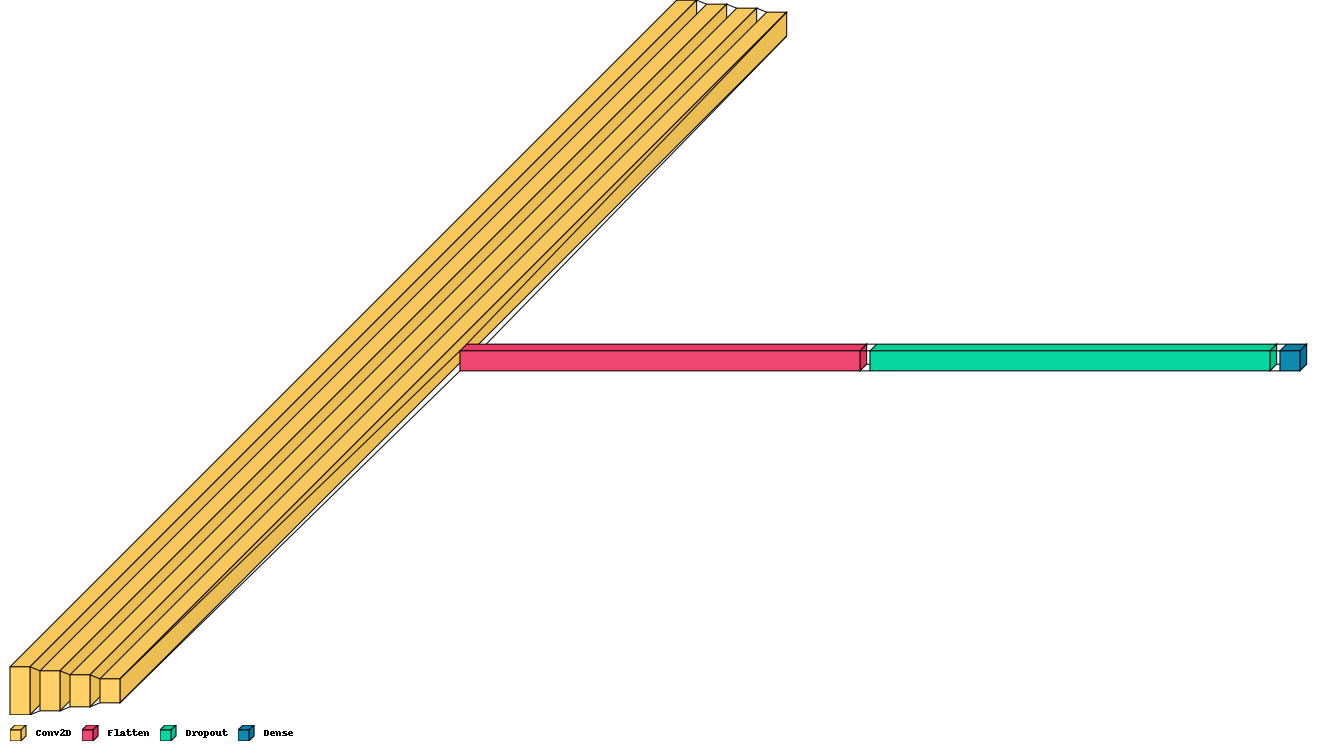

In [52]:
visualkeras.layered_view(model_k,legend=True, draw_volume=True)

In [53]:
pat = 5 #this is the number of epochs with no improvment after which the training will stop
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)
model_checkpoint = ModelCheckpoint('cnn_cv.h5', verbose=1, save_best_only=True)
test_accuracy = []
confusion = []

#define a function to fit the model
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS, BATCH_SIZE):
    model = None
    model = cnn_model_k()
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping, model_checkpoint], 
              verbose=1, validation_split=0.1)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    model_pred_k = np.argmax(model.predict(x_test_CNN), axis = 1)
    confusion.append(model_pred_k)
    test_accuracy.append(accuracy_score(y_test, model_pred_k[:, None]))
    return results

In [54]:
n_folds=5
epochs=100
batch_size=4

model_history = [] 


for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(x_train_CNN, y_train, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))

    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 0.8710 - accuracy: 0.2840
Epoch 1: val_loss improved from inf to 0.61800, saving model to cnn_cv.h5
61/61 [==============================] - 2s 22ms/step - loss: 0.8710 - accuracy: 0.2840 - val_loss: 0.6180 - val_accuracy: 0.3333
Epoch 2/100
58/61 [===========================>..] - ETA: 0s - loss: 0.4333 - accuracy: 0.6121
Epoch 2: val_loss improved from 0.61800 to 0.61696, saving model to cnn_cv.h5
61/61 [==============================] - 1s 20ms/step - loss: 0.4338 - accuracy: 0.6091 - val_loss: 0.6170 - val_accuracy: 0.4444
Epoch 3/100
60/61 [============================>.] - ETA: 0s - loss: 0.3345 - accuracy: 0.7875
Epoch 3: val_loss improved from 0.61696 to 0.56724, saving model to cnn_cv.h5
61/61 [==============================] - 1s 21ms/step - loss: 0.3358 - accuracy: 0.7819 - val_loss: 0.5672 - val_accuracy: 0.3704
Epoch 4/100
61/61 [==============================] - ETA: 0s - loss: 0.206

59/61 [============================>.] - ETA: 0s - loss: 0.1815 - accuracy: 0.9619
Epoch 5: val_loss did not improve from 0.56724
61/61 [==============================] - 1s 18ms/step - loss: 0.1793 - accuracy: 0.9630 - val_loss: 0.8543 - val_accuracy: 0.2222
Epoch 6/100
61/61 [==============================] - ETA: 0s - loss: 0.1283 - accuracy: 0.9835
Epoch 6: val_loss did not improve from 0.56724
61/61 [==============================] - 1s 19ms/step - loss: 0.1283 - accuracy: 0.9835 - val_loss: 1.1338 - val_accuracy: 0.2222
Epoch 6: early stopping
1/1 [==============================] - 0s 26ms/step - loss: 0.7400 - accuracy: 0.3667
Val Score:  [0.7400012612342834, 0.36666667461395264]
4/4 [==============================] - 0s 11ms/step


Training on Fold:  5
Epoch 1/100
59/61 [============================>.] - ETA: 0s - loss: 0.8468 - accuracy: 0.2415
Epoch 1: val_loss did not improve from 0.56724
61/61 [==============================] - 2s 20ms/step - loss: 0.8419 - accuracy: 0.2428

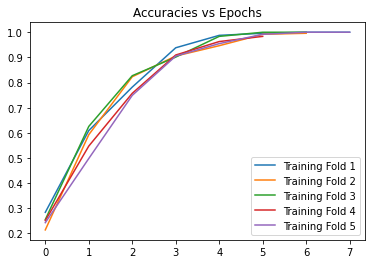

In [55]:
plt.title('Accuracies vs Epochs')
plt.plot(model_history[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history[2].history['accuracy'], label='Training Fold 3')
plt.plot(model_history[3].history['accuracy'], label='Training Fold 4')
plt.plot(model_history[4].history['accuracy'], label='Training Fold 5')
plt.legend()
plt.show()

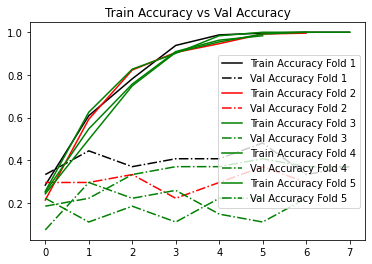

In [56]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
plt.plot(model_history[3].history['accuracy'], label='Train Accuracy Fold 4', color='green', )
plt.plot(model_history[3].history['val_accuracy'], label='Val Accuracy Fold 4', color='green', linestyle = "dashdot")
plt.plot(model_history[4].history['accuracy'], label='Train Accuracy Fold 5', color='green', )
plt.plot(model_history[4].history['val_accuracy'], label='Val Accuracy Fold 5', color='green', linestyle = "dashdot")
plt.legend()
plt.show()

In [57]:
accuracy_1 = np.array(model_history[0].history['val_accuracy'])
accuracy_2 = np.array(model_history[1].history['val_accuracy'])
accuracy_3 = np.array(model_history[2].history['val_accuracy'])
accuracy_4 = np.array(model_history[3].history['val_accuracy'])
accuracy_5 = np.array(model_history[4].history['val_accuracy'])

print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracy_1.mean(), accuracy_1.std()))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracy_2.mean(), accuracy_2.std()))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracy_3.mean(), accuracy_3.std()))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracy_4.mean(), accuracy_4.std()))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracy_5.mean(), accuracy_5.std()))

0.39 accuracy with a standard deviation of 0.05
0.30 accuracy with a standard deviation of 0.04
0.19 accuracy with a standard deviation of 0.08
0.18 accuracy with a standard deviation of 0.05
0.33 accuracy with a standard deviation of 0.08


In [58]:
test = np.array(test_accuracy)
print("%0.2f accuracy with a standard deviation of %0.2f" % (test.mean(), test.std()))

0.27 accuracy with a standard deviation of 0.04


Confusion martix no: 1


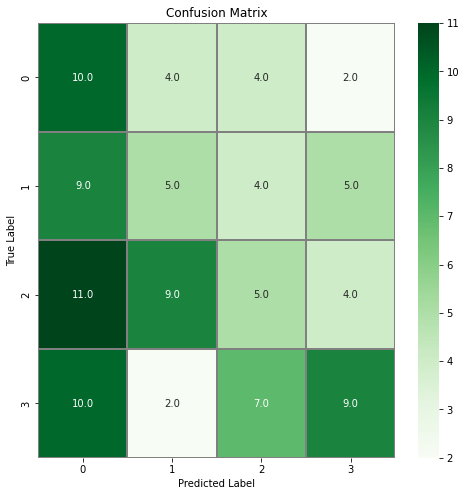

Confusion martix no: 2


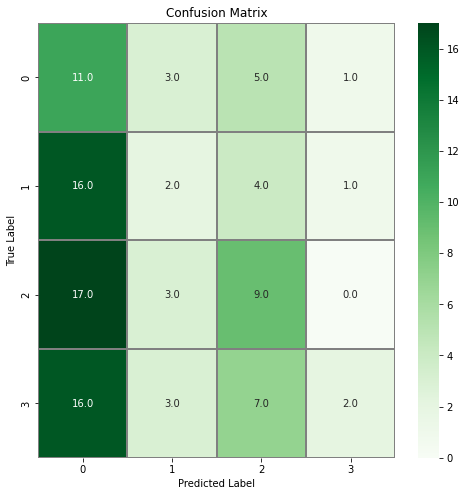

Confusion martix no: 3


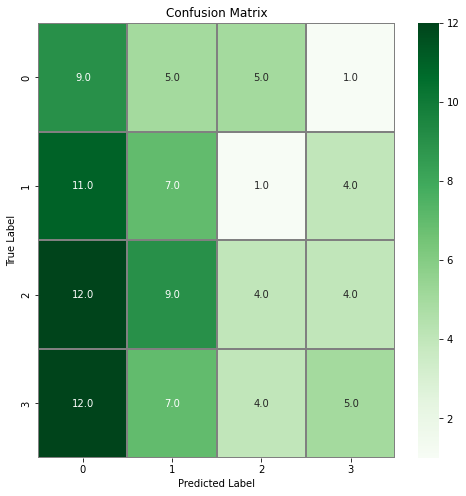

Confusion martix no: 4


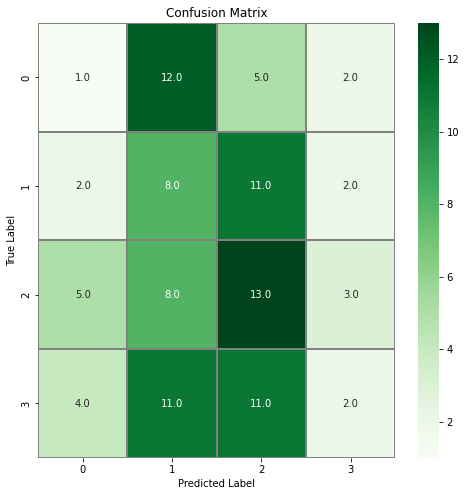

Confusion martix no: 5


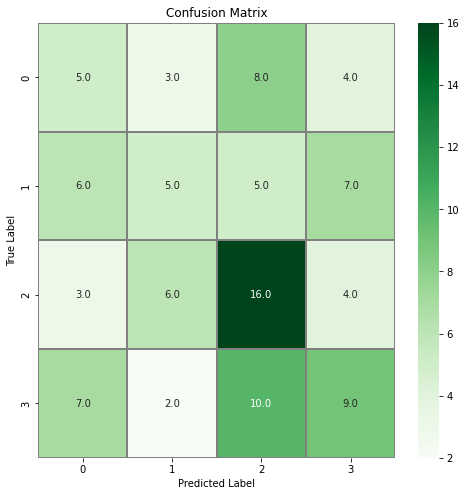

In [59]:
for i in range(len(confusion)):
    print("Confusion martix no:", i+1)
    confusion_mtx = confusion_matrix(y_test, confusion[i]) 
    
    f,ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

## Random Forest

In [60]:
x = speaking_processed_text
y = targets_text

x_train, x_test, y_train, y_test = train_test_split(x, y)

pipe = Pipeline([
    ('scalar', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state = 1))
])

params = {'scalar': [StandardScaler(), MinMaxScaler()]}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
search = GridSearchCV(pipe, params, cv = cv, refit = True)
optimal = search.fit(x_train, y_train) 

mean_score = (optimal.score(x_test, y_test),optimal.cv_results_['std_test_score'][optimal.best_index_])

print("Mean, STD", mean_score)

Mean, STD (0.41, 0.06704522151798041)


## Binary classification of phoneme

In [61]:
speaking_processed = speaking_processed_mne.to_data_frame().drop(columns = ['time']).to_numpy().reshape(speaking.shape[0] // (512), 512 * 14)
speaking_processed.shape

(1300, 7168)

In [62]:
new_column_values = modes_of_stimuli
nw = targets
df = pd.DataFrame(speaking_processed)

df["mode"] = new_column_values 
df["Label"] = nw
df

0         1         2          3          4          5  \
0    -0.000130 -0.000280 -0.000263  -0.001304  -0.000213  -0.000176   
1     0.462564 -2.216034  8.196046   0.497344  -0.379170   2.108477   
2    -1.507793  2.563895 -2.033442 -16.754660 -29.371291 -12.642524   
3    -1.696602  0.036196  1.237802  11.304930  34.082509   4.430307   
4    -1.723774 -2.590154  3.881065  19.692119  99.728052   6.005747   
...        ...       ...       ...        ...        ...        ...   
1295  0.391655 -1.744577 -1.020734   0.381854  -0.780802   4.064158   
1296 -0.551785  3.106349 -5.833809  -0.915800   4.139789  -3.490751   
1297 -2.448526  0.825180 -9.080749  -7.040516  -5.421760   0.358070   
1298  3.014187  2.508936 -0.415950  -2.066907   1.313944  -7.739497   
1299 -1.569502 -9.643832 -3.179047  -6.541007 -15.088244  -1.512419   

              6         7          8          9  ...       7160      7161  \
0     -0.000142 -0.000133  -0.000254  -0.000228  ...  15.376747  0.812099   
1     -8.028206  6.347065   0.533936   1.656440  ...   9.929596  3.783971   
2    -37.889864 -0.183543   9.533291   2.084072  ... -11.969843 -1.650240   
3    -32.247104 -9.829364 -14.036958  -1.419649  ...  -9.965024 -2.267662   
4    -29.869472 -5.927888  -1.028668   0.696430  ...   0.483570  4.295711   
...         ...       ...        ...        ...  ...        ...       ...   
1295  -2.068012 -1.397286   0.462103  -4.197500  ...  14.289469 -1.229297   
1296   6.385991  0.780289   9.945394  -4.869259  ... -27.777503  7.744560   
1297  15.617515  1.138331   2.971656 -11.526957  ...  -8.187349  0.492587   
1298 -21.407375  4.615443   6.244135   5.365843  ...   2.733518 -2.974634   
1299   6.260110 -6.354873  -3.280267   6.286941  ...  -0.000142 -0.000133   

          7162      7163       7164       7165      7166       7167   mode  \
0    -1.086160  6.545585  -1.864313  -5.757654 -1.599615 -13.063223  audio   
1    -5.250027  1.506029  -4.240029  -1.607717 -3.915663   8.858576  image   
2    -4.710308 -1.103841  -2.400820   6.915811 -3.163784   5.906870  image   
3    -4.874176  6.030323  29.619541  14.413840  0.494934   1.543651  audio   
4     1.076967 -2.141959   4.763586  -9.164707  0.893655   9.249753   text   
...        ...       ...        ...        ...       ...        ...    ...   
1295  2.547236 -7.682578   9.921435   2.739657 -5.070887  -2.797598  image   
1296  2.933589  8.279982  35.954304  -0.772055 -3.369308   9.628668  audio   
1297  1.799772  1.986672   4.694391   2.433502 -1.832204  24.446142   None   
1298 -0.790240 -3.150852  -7.320221  -1.427992  2.253394   2.434268  image   
1299 -0.000254 -0.000228  -0.001059  -0.000166 -0.000187  -0.000211   text   

          Label  
0          Lamp  
1     Ambulance  
2     Ambulance  
3         Clock  
4     Ambulance  
...         ...  
1295       Lamp  
1296   Hospital  
1297       Rest  
1298      Clock  
1299      Clock  

[1300 rows x 7170 columns]

In [63]:
speaking_full = df.drop(columns = 'mode')
speaking_full

0         1         2          3          4          5  \
0    -0.000130 -0.000280 -0.000263  -0.001304  -0.000213  -0.000176   
1     0.462564 -2.216034  8.196046   0.497344  -0.379170   2.108477   
2    -1.507793  2.563895 -2.033442 -16.754660 -29.371291 -12.642524   
3    -1.696602  0.036196  1.237802  11.304930  34.082509   4.430307   
4    -1.723774 -2.590154  3.881065  19.692119  99.728052   6.005747   
...        ...       ...       ...        ...        ...        ...   
1295  0.391655 -1.744577 -1.020734   0.381854  -0.780802   4.064158   
1296 -0.551785  3.106349 -5.833809  -0.915800   4.139789  -3.490751   
1297 -2.448526  0.825180 -9.080749  -7.040516  -5.421760   0.358070   
1298  3.014187  2.508936 -0.415950  -2.066907   1.313944  -7.739497   
1299 -1.569502 -9.643832 -3.179047  -6.541007 -15.088244  -1.512419   

              6         7          8          9  ...      7159       7160  \
0     -0.000142 -0.000133  -0.000254  -0.000228  ...  1.127308  15.376747   
1     -8.028206  6.347065   0.533936   1.656440  ... -3.364209   9.929596   
2    -37.889864 -0.183543   9.533291   2.084072  ...  3.474550 -11.969843   
3    -32.247104 -9.829364 -14.036958  -1.419649  ...  2.570027  -9.965024   
4    -29.869472 -5.927888  -1.028668   0.696430  ...  0.334411   0.483570   
...         ...       ...        ...        ...  ...       ...        ...   
1295  -2.068012 -1.397286   0.462103  -4.197500  ...  2.255335  14.289469   
1296   6.385991  0.780289   9.945394  -4.869259  ...  2.725895 -27.777503   
1297  15.617515  1.138331   2.971656 -11.526957  ... -6.472090  -8.187349   
1298 -21.407375  4.615443   6.244135   5.365843  ...  1.753441   2.733518   
1299   6.260110 -6.354873  -3.280267   6.286941  ... -0.000176  -0.000142   

          7161      7162      7163       7164       7165      7166       7167  \
0     0.812099 -1.086160  6.545585  -1.864313  -5.757654 -1.599615 -13.063223   
1     3.783971 -5.250027  1.506029  -4.240029  -1.607717 -3.915663   8.858576   
2    -1.650240 -4.710308 -1.103841  -2.400820   6.915811 -3.163784   5.906870   
3    -2.267662 -4.874176  6.030323  29.619541  14.413840  0.494934   1.543651   
4     4.295711  1.076967 -2.141959   4.763586  -9.164707  0.893655   9.249753   
...        ...       ...       ...        ...        ...       ...        ...   
1295 -1.229297  2.547236 -7.682578   9.921435   2.739657 -5.070887  -2.797598   
1296  7.744560  2.933589  8.279982  35.954304  -0.772055 -3.369308   9.628668   
1297  0.492587  1.799772  1.986672   4.694391   2.433502 -1.832204  24.446142   
1298 -2.974634 -0.790240 -3.150852  -7.320221  -1.427992  2.253394   2.434268   
1299 -0.000133 -0.000254 -0.000228  -0.001059  -0.000166 -0.000187  -0.000211   

          Label  
0          Lamp  
1     Ambulance  
2     Ambulance  
3         Clock  
4     Ambulance  
...         ...  
1295       Lamp  
1296   Hospital  
1297       Rest  
1298      Clock  
1299      Clock  

[1300 rows x 7169 columns]

In [64]:
al = ['Ambulance', 'Lamp']
hc = ['Hospital', 'Clock']

def split(dataframe):
    
    targets_al = dataframe[dataframe['Label'].isin(al)]
    targets_hc = dataframe[dataframe['Label'].isin(hc)]
    
    targets_al = targets_al['Label'].to_numpy()
    targets_hc = targets_hc['Label'].to_numpy()
    
    return targets_al, targets_hc

targets_al, targets_hc = split(speaking_full)


speaking_full_al = speaking_full[speaking_full['Label'].isin(al)]
speaking_full_hc = speaking_full[speaking_full['Label'].isin(hc)]

speaking_full_al = speaking_full_al.drop(columns = ['Label']).to_numpy()
speaking_full_hc = speaking_full_hc.drop(columns = ['Label']).to_numpy()


print(speaking_full_al.shape, speaking_full_hc.shape)
print(targets_al.shape, targets_hc.shape)

(600, 7168) (600, 7168)
(600,) (600,)


### SVM

In [65]:
one_hot_encoder = OneHotEncoder(sparse=False)
y = one_hot_encoder.fit_transform(targets_al[:,None])
y_ONE = np.argmax(y, axis = 1)

In [66]:
clf = svm.SVC(kernel='rbf') 

scores = cross_val_score(clf, speaking_full_al, y_ONE, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.38333333 0.61666667 0.45       0.46666667 0.46666667 0.43333333
 0.53333333 0.53333333 0.51666667 0.55      ]
0.49 accuracy with a standard deviation of 0.06


In [67]:
one_hot_encoder = OneHotEncoder(sparse=False)
y = one_hot_encoder.fit_transform(targets_hc[:,None])
y_ONE = np.argmax(y, axis = 1)

In [68]:
clf = svm.SVC(kernel='rbf') 

scores = cross_val_score(clf, speaking_full_hc, y_ONE, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.58333333 0.56666667 0.53333333 0.56666667 0.5        0.56666667
 0.58333333 0.6        0.51666667 0.53333333]
0.55 accuracy with a standard deviation of 0.03


### CNN

In [69]:
x_train, x_test, y_train, y_test = train_test_split(speaking_full_hc, targets_hc)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(450, 7168) (450,) (150, 7168) (150,)


In [70]:
one_hot_encoder = OneHotEncoder(sparse=False)
y_train = one_hot_encoder.fit_transform(y_train[:, None])
y_train_IE = np.argmax(y_train, axis = 1)
y_test = np.argmax(one_hot_encoder.transform(y_test[:, None]), axis = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_train_IE.shape, y_test.shape)

(450, 7168) (150, 7168) (450, 2) (450,) (150,)


In [71]:
x_train_CNN = x_train.reshape(x_train.shape[0], 512, 14, 1)
x_test_CNN = x_test.reshape(x_test.shape[0],512, 14, 1)

In [72]:
def cnn_model_k():
    
    epochs=100
    batch_size=4
    
    model = Sequential()
    
    model.add(Conv2D(10, kernel_size=3, activation = 'relu', input_shape=(512, 14, 1)))
    model.add(Conv2D(20, kernel_size=3, activation = 'relu'))
    model.add(Conv2D(20, kernel_size=3, activation = 'relu'))
    model.add(Conv2D(20, kernel_size=3, activation = 'relu'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(2, activation= 'softmax'))
    init_lr = 1e-4
    opt = Adam(learning_rate=init_lr, decay=init_lr / epochs)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [73]:
model_k = cnn_model_k()

In [74]:
model_k.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 510, 12, 10)       100       
                                                                 
 conv2d_25 (Conv2D)          (None, 508, 10, 20)       1820      
                                                                 
 conv2d_26 (Conv2D)          (None, 506, 8, 20)        3620      
                                                                 
 conv2d_27 (Conv2D)          (None, 504, 6, 20)        3620      
                                                                 
 flatten_6 (Flatten)         (None, 60480)             0         
                                                                 
 dropout_6 (Dropout)         (None, 60480)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                

In [75]:
pat = 5 
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)
model_checkpoint = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)
test_accuracy = []
confusion = []

def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS, BATCH_SIZE):
    model = None
    model = cnn_model_k()
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping, model_checkpoint], 
              verbose=1, validation_split=0.1)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    model_pred_k = np.argmax(model.predict(x_test_CNN), axis = 1)
    confusion.append(model_pred_k)
    test_accuracy.append(accuracy_score(y_test, model_pred_k[:, None]))
    return results

In [76]:
n_folds=5
epochs=100
batch_size=4

model_history = [] 


for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(x_train_CNN, y_train, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))

    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/100
91/91 [==============================] - ETA: 0s - loss: 1.0170 - accuracy: 0.5275
Epoch 1: val_loss improved from inf to 0.84602, saving model to fas_mnist_1.h5
91/91 [==============================] - 2s 19ms/step - loss: 1.0170 - accuracy: 0.5275 - val_loss: 0.8460 - val_accuracy: 0.5122
Epoch 2/100
90/91 [============================>.] - ETA: 0s - loss: 0.5692 - accuracy: 0.7139
Epoch 2: val_loss did not improve from 0.84602
91/91 [==============================] - 2s 19ms/step - loss: 0.5699 - accuracy: 0.7115 - val_loss: 0.9323 - val_accuracy: 0.4390
Epoch 3/100
89/91 [============================>.] - ETA: 0s - loss: 0.4491 - accuracy: 0.8230
Epoch 3: val_loss did not improve from 0.84602
91/91 [==============================] - 2s 19ms/step - loss: 0.4479 - accuracy: 0.8242 - val_loss: 0.9646 - val_accuracy: 0.4878
Epoch 4/100
91/91 [==============================] - ETA: 0s - loss: 0.3372 - accuracy: 0.8901
Epoch 4: val_loss did not improve fr

Epoch 7/100
90/91 [============================>.] - ETA: 0s - loss: 0.1419 - accuracy: 0.9889
Epoch 7: val_loss did not improve from 0.66830
91/91 [==============================] - 2s 18ms/step - loss: 0.1437 - accuracy: 0.9890 - val_loss: 1.0241 - val_accuracy: 0.5122
Epoch 8/100
89/91 [============================>.] - ETA: 0s - loss: 0.0993 - accuracy: 0.9972
Epoch 8: val_loss did not improve from 0.66830
91/91 [==============================] - 2s 19ms/step - loss: 0.0979 - accuracy: 0.9973 - val_loss: 1.0877 - val_accuracy: 0.5854
Epoch 8: early stopping
2/2 [==============================] - 0s 9ms/step - loss: 1.0304 - accuracy: 0.4000
Val Score:  [1.0304453372955322, 0.4000000059604645]
5/5 [==============================] - 0s 17ms/step


Training on Fold:  5
Epoch 1/100
89/91 [============================>.] - ETA: 0s - loss: 1.2435 - accuracy: 0.5449
Epoch 1: val_loss did not improve from 0.66830
91/91 [==============================] - 2s 20ms/step - loss: 1.2249 - accura

In [77]:
test = np.array(test_accuracy)
print("%0.2f accuracy with a standard deviation of %0.2f" % (test.mean(), test.std()))

0.46 accuracy with a standard deviation of 0.03


### RF

In [78]:
x = speaking_full_al
y = targets_al

x_train, x_test, y_train, y_test = train_test_split(x, y)

pipe = Pipeline([
    ('scalar', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state = 1))
])

params = {'scalar': [StandardScaler(), MinMaxScaler()]}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
search = GridSearchCV(pipe, params, cv = cv, refit = True)
optimal = search.fit(x_train, y_train) 


mean_score = (optimal.score(x_test, y_test),optimal.cv_results_['std_test_score'][optimal.best_index_])

print("Mean, STD", mean_score)

Mean, STD (0.5, 0.06715867826158896)


In [79]:
x = speaking_full_hc
y = targets_hc

x_train, x_test, y_train, y_test = train_test_split(x, y)

pipe = Pipeline([
    ('scalar', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state = 1))
])

params = {'scalar': [StandardScaler(), MinMaxScaler()]}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
search = GridSearchCV(pipe, params, cv = cv, refit = True)
optimal = search.fit(x_train, y_train) 

mean_score = (optimal.score(x_test, y_test),optimal.cv_results_['std_test_score'][optimal.best_index_])

print("Mean, STD", mean_score)

Mean, STD (0.56, 0.08278088485344513)


# Generating graphs of results

## Mode of stimulus classification

In [80]:
part = ['Participant 1', 'Participant 2', 'Participant 3', 
        'Participant 4', 'Participant 5', 'Participant 6', 
        'Participant 7', 'Participant 8', 'Participant 9', 'Average']

cnn_audio = [30, 35, 28, 24, 29, 27, 23, 31, 30, 29]
err_cnn_audio = [2, 3, 2, 5, 5, 3, 2, 4, 5, 3]

cnn_text = [32, 29, 35, 27, 29, 27, 27, 27, 29, 29]
err_cnn_text = [2, 3, 3, 1, 2, 3, 4, 7, 3, 3]

cnn_image = [39, 38, 33, 34, 35, 26, 32, 34, 30, 33]
err_cnn_image = [4, 3, 4, 3, 4, 3, 3, 3, 4, 3]

svm_audio = [27, 29, 29, 30, 34, 32, 29, 31, 32, 30]
err_svm_audio = [6, 5, 6, 5, 5, 5, 6, 5, 7, 6]

svm_text = [33, 28, 32, 24, 36, 33, 35, 31, 29, 31]
err_svm_text = [4, 4, 4, 4, 6, 3, 5, 3, 8, 5]

svm_image = [33, 37, 27, 32, 35, 30, 27, 37, 31, 32]
err_svm_image = [7, 5, 5, 4, 8, 4, 5, 4, 7, 5]

rf_audio = [25, 38, 34, 26, 30, 28, 38, 29, 25, 30]
err_rf_audio = [7, 8, 7, 7, 8, 7, 8, 8, 9, 8]

rf_text = [32, 23, 26, 24, 28, 28, 36, 27, 30, 28]
err_rf_text= [7, 7, 8, 8, 9, 8, 6, 8, 9, 8]

rf_image = [31, 32, 32, 26, 33, 25, 31, 36, 24, 30]
err_rf_image = [5, 8, 9, 6, 9, 8, 7, 10, 6, 8]

results = pd.DataFrame({
    'Participants': part,
    'cnn_audio': cnn_audio, 'cnn_text': cnn_text, 'cnn_image': cnn_image,
    'svm_audio': svm_audio, 'svm_text': svm_text, 'svm_image': svm_image,
    'rf_audio': rf_audio, 'rf_text': rf_text, 'rf_image': rf_image
})

wd = 0.2
x_pos = np.arange(len(results))

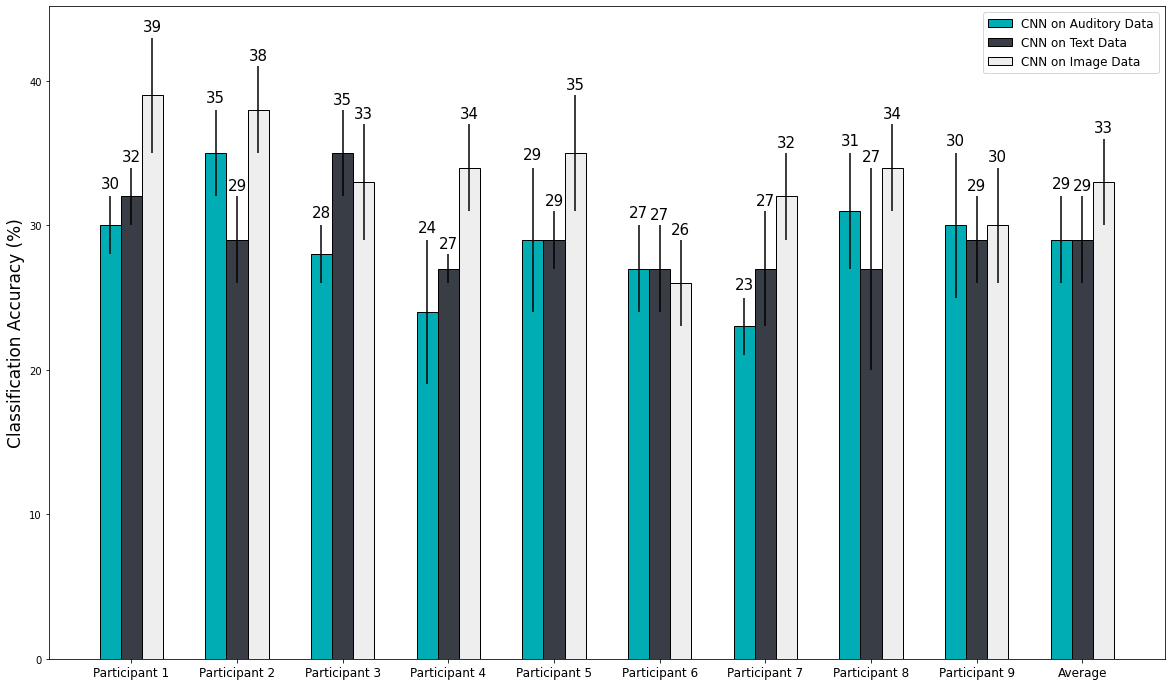

In [81]:
fig = plt.figure(figsize=[20, 12])
ax = fig.add_subplot()


rects1 = ax.bar(x_pos, results.cnn_audio, color='#00ADB5', width=wd, edgecolor='k', yerr=err_cnn_audio,
                label='CNN on Auditory Data')

rects2 = ax.bar(x_pos+wd, results.cnn_text, color='#393E46', width=wd, edgecolor='k',
        label='CNN on Text Data', yerr=err_cnn_text)

rects3 = ax.bar(x_pos+(wd*2), results.cnn_image, color='#EEEEEE', width=wd, edgecolor='k',
        label='CNN on Image Data', yerr=err_cnn_image)

ax.set_ylabel('Classification Accuracy (%)', fontsize=17)
ax.set_xticks(x_pos+wd, fontsize=15)
ax.set_xticklabels(part, fontsize=12)
ax.legend(loc='best', fontsize=12)

ax.bar_label(rects1, padding=5, fontsize=15)
ax.bar_label(rects2, padding=3, fontsize=15)
ax.bar_label(rects3, padding=3, fontsize=15)

plt.show()

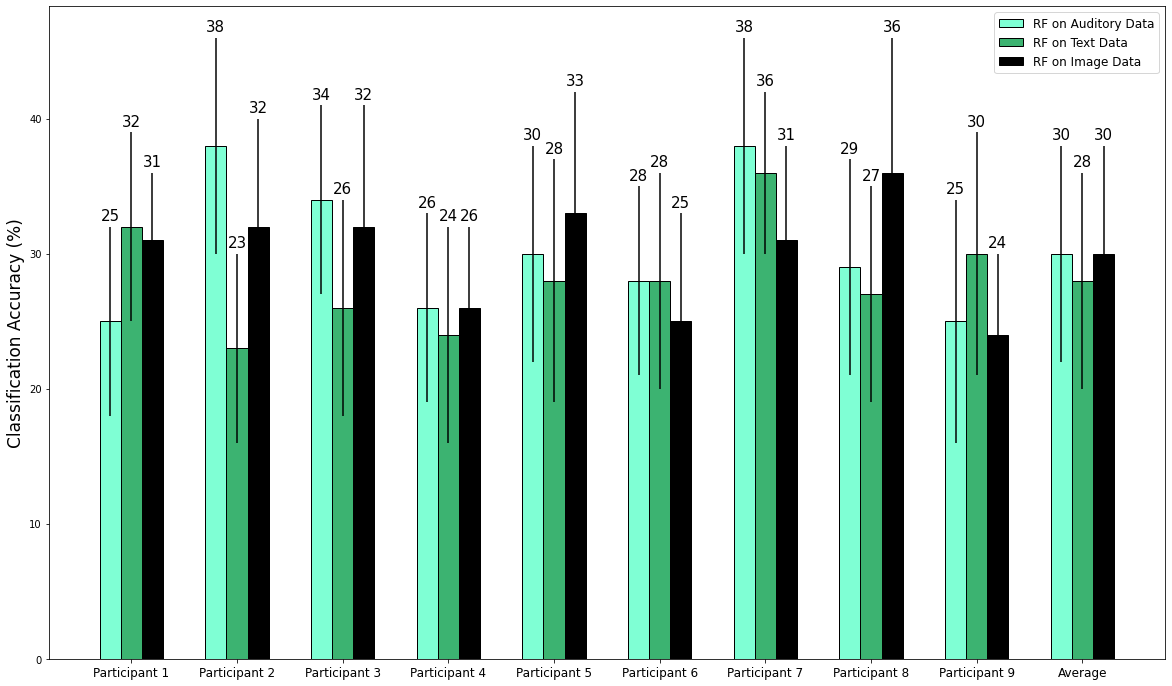

In [82]:
fig = plt.figure(figsize=[20, 12])
ax = fig.add_subplot()


rects1 = ax.bar(x_pos, results.rf_audio, color='aquamarine', width=wd, edgecolor='k',
        label='RF on Auditory Data', yerr=err_rf_audio)

rects2 = ax.bar(x_pos+(wd), results.rf_text, color='mediumseagreen', width=wd, edgecolor='k',
        label='RF on Text Data', yerr=err_rf_text)

rects3 = ax.bar(x_pos+(wd*2), results.rf_image, color='k', width=wd, edgecolor='k',
        label='RF on Image Data', yerr=err_rf_image)

ax.set_ylabel('Classification Accuracy (%)', fontsize=17)
ax.set_xticks(x_pos+wd, fontsize=15)
ax.set_xticklabels(part, fontsize=12)
ax.legend(loc='best', fontsize=12)

ax.bar_label(rects1, padding=3, fontsize=15)
ax.bar_label(rects2, padding=3, fontsize=15)
ax.bar_label(rects3, padding=3, fontsize=15)

plt.show()

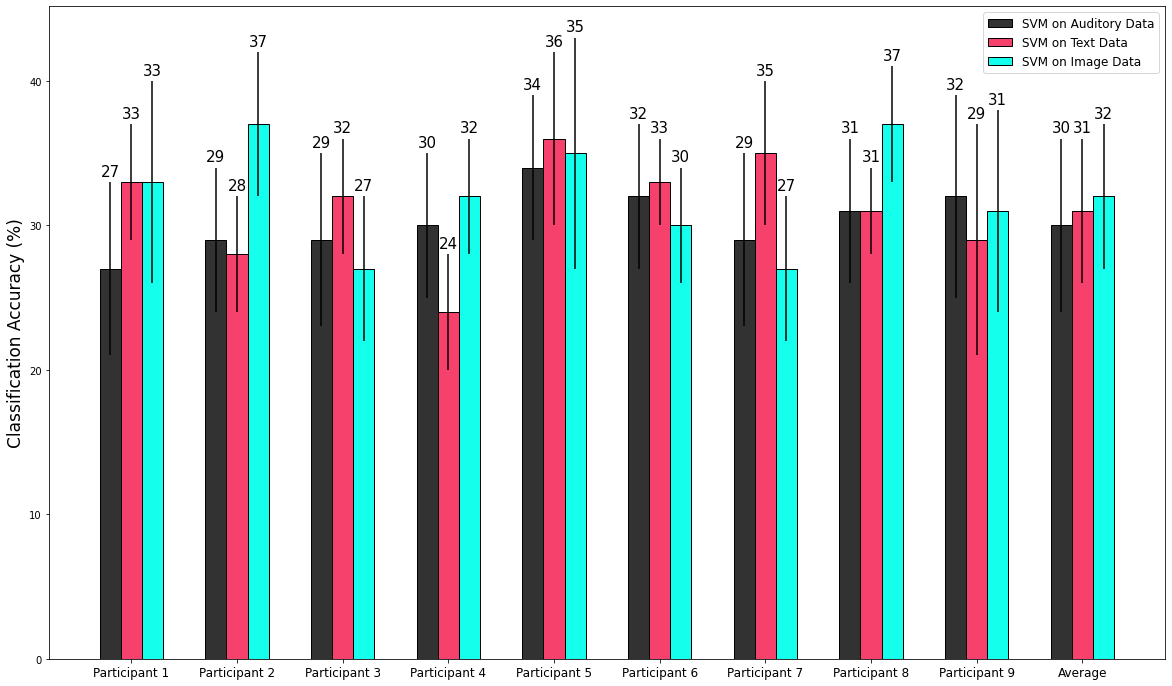

In [83]:
fig = plt.figure(figsize=[20, 12])
ax = fig.add_subplot()


rects1 = ax.bar(x_pos, results.svm_audio, color='#323232', width=wd, edgecolor='k',
        label='SVM on Auditory Data', yerr=err_svm_audio)

rects2 = ax.bar(x_pos+(wd), results.svm_text, color='#F6416C', width=wd, edgecolor='k',
        label='SVM on Text Data', yerr=err_svm_text)

rects3 = ax.bar(x_pos+(wd*2), results.svm_image, color='#14FFEC', width=wd, edgecolor='k',
        label='SVM on Image Data', yerr=err_svm_image)

ax.set_ylabel('Classification Accuracy (%)', fontsize=17)
ax.set_xticks(x_pos+wd, fontsize=15)
ax.set_xticklabels(part, fontsize=12)
ax.legend(loc='best', fontsize=12)

ax.bar_label(rects1, padding=3, fontsize=15)
ax.bar_label(rects2, padding=3, fontsize=15)
ax.bar_label(rects3, padding=3, fontsize=15)

plt.show()

## Phoneme classification results

In [84]:
parti = ['Participant 1', 'Participant 2', 'Participant 3', 
        'Participant 4', 'Participant 5', 'Participant 6', 
        'Participant 7', 'Participant 8', 'Participant 9', 'Average']

cnn_al = [50, 47, 49, 55, 49, 57, 51, 47, 47, 50]
err_cnn_al = [5, 4, 3, 2, 3, 6, 3, 4, 5, 4]

cnn_hc = [45, 51, 55, 54, 58, 46, 54, 54, 48, 52]
err_cnn_hc = [3, 4, 3, 3, 4, 3, 2, 3, 2, 3]

svm_al = [52, 49, 50, 54, 55, 57, 52, 55, 54, 53]
err_svm_al = [4, 6, 8, 4, 3, 2, 5, 3, 4, 4]

svm_hc = [51, 55, 51, 49, 53, 51, 56, 56, 60, 54]
err_svm_hc = [5, 3, 5, 6, 8, 6, 4, 6, 7, 5]

rf_al = [49, 50, 44, 49, 53, 56, 50, 60, 56, 52]
err_rf_al = [7, 6, 5, 7, 9, 6, 8, 8, 5, 7]

rf_hc = [53, 53, 53, 55, 53, 47, 50, 60, 56, 53]
err_rf_hc = [7, 7, 6, 7, 4, 8, 7, 9, 7, 7]


result = pd.DataFrame({
    'Participants': parti,
    'cnn_al': cnn_al, 'cnn_hc': cnn_hc, 
    'svm_al': svm_al, 'svm_hc': svm_hc,
    'rf_al': rf_al, 'rf_hc': rf_hc
})

wd = 0.2
x_pos_new = np.arange(len(result))

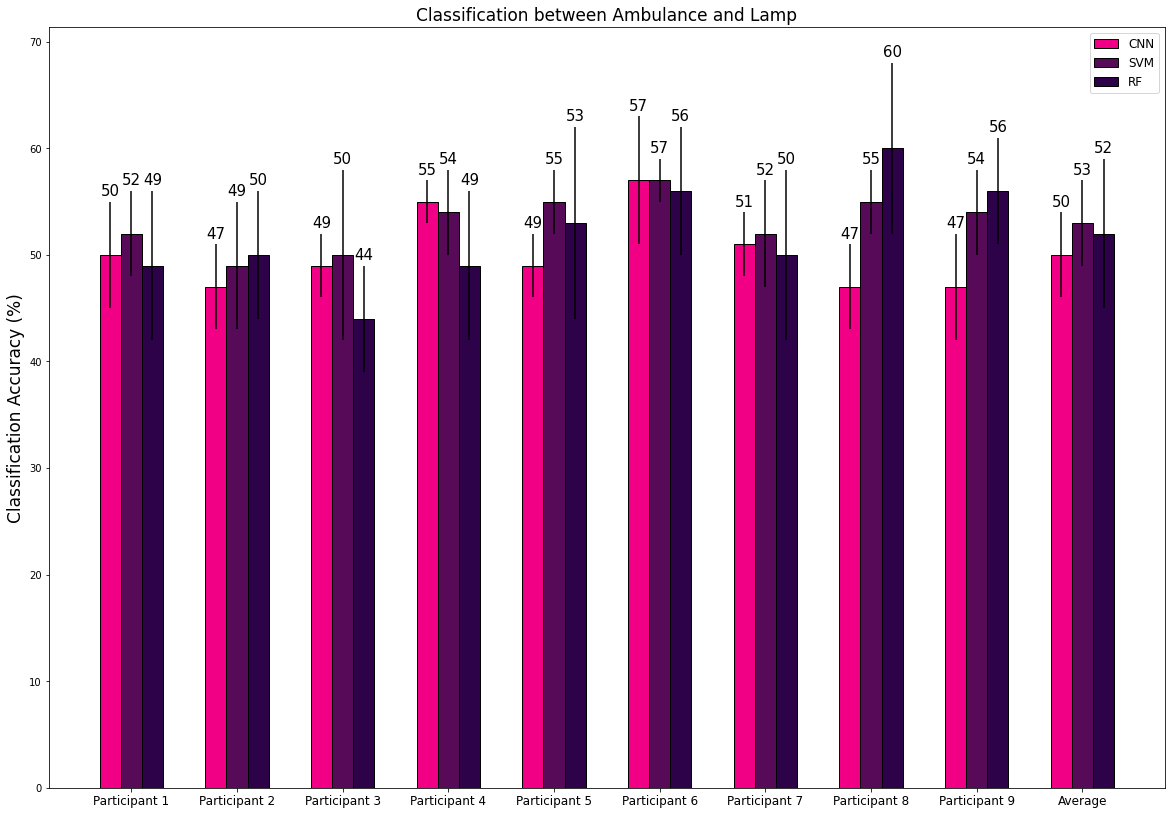

In [85]:
fig = plt.figure(figsize=[20, 14])
ax = fig.add_subplot()


rects1 = ax.bar(x_pos_new, result.cnn_al, color='#F10086', width=wd, edgecolor='k',
        label='CNN', yerr=err_cnn_al)

rects2 = ax.bar(x_pos_new+(wd), result.svm_al, color='#570A57', width=wd, edgecolor='k',
        label='SVM', yerr=err_svm_al)

rects3 = ax.bar(x_pos_new+(wd*2), result.rf_al, color='#2E0249', width=wd, edgecolor='k',
        label='RF', yerr=err_rf_al)

ax.set_ylabel('Classification Accuracy (%)', fontsize=17)
ax.set_title('Classification between Ambulance and Lamp', fontsize=17)
ax.set_xticks(x_pos_new+wd, fontsize=15)
ax.set_xticklabels(parti, fontsize=12)
ax.legend(loc='best', fontsize=12)

ax.bar_label(rects1, padding=3, fontsize=15)
ax.bar_label(rects2, padding=3, fontsize=15)
ax.bar_label(rects3, padding=3, fontsize=15)

plt.show()

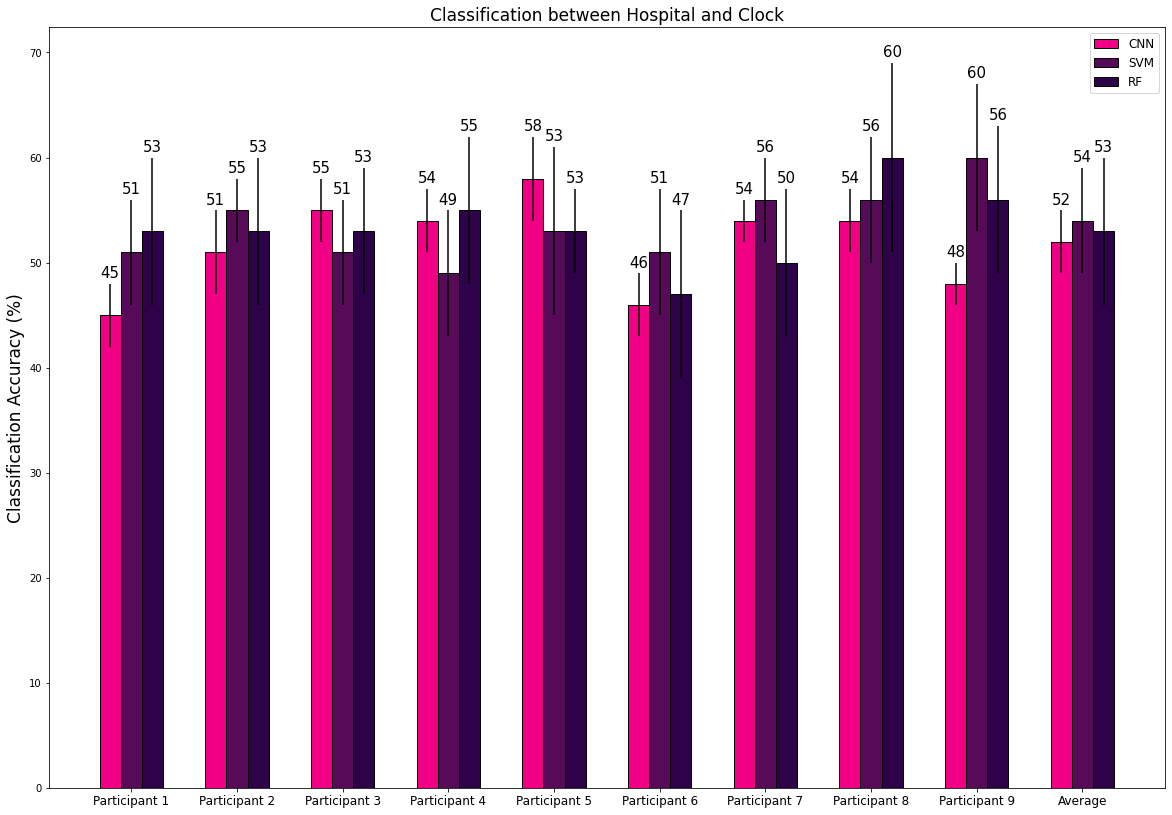

In [86]:
fig = plt.figure(figsize=[20, 14])
ax = fig.add_subplot()


rects1 = ax.bar(x_pos_new, result.cnn_hc, color='#F10086', width=wd, edgecolor='k',
        label='CNN', yerr=err_cnn_hc)

rects2 = ax.bar(x_pos_new+(wd), result.svm_hc, color='#570A57', width=wd, edgecolor='k',
        label='SVM', yerr=err_svm_hc)

rects3 = ax.bar(x_pos_new+(wd*2), result.rf_hc, color='#2E0249', width=wd, edgecolor='k',
        label='RF', yerr=err_rf_hc)

ax.set_ylabel('Classification Accuracy (%)', fontsize=17)
ax.set_title('Classification between Hospital and Clock', fontsize=17)
ax.set_xticks(x_pos_new+wd, fontsize=15)
ax.set_xticklabels(parti, fontsize=12)
ax.legend(loc='best', fontsize=12)

ax.bar_label(rects1, padding=3, fontsize=15)
ax.bar_label(rects2, padding=3, fontsize=15)
ax.bar_label(rects3, padding=3, fontsize=15)

plt.show()